In [1]:
import pandas as pd

# Load the Games CSV file
games_df = pd.read_csv('data/Games.csv')

# Show the first few rows
print(games_df.head())

# Get data types and missing values
print(games_df.info())

# Show summary statistics
print(games_df.describe())


     gameId             gameDate hometeamCity hometeamName  hometeamId  \
0  22400988  2025-04-01 20:00:00  San Antonio        Spurs  1610612759   
1  22400996  2025-03-20 22:30:00  Los Angeles       Lakers  1610612747   
2  22400627  2025-03-19 21:00:00         Utah         Jazz  1610612762   
3  22400997  2025-03-18 22:30:00  Los Angeles     Clippers  1610612746   
4  22400994  2025-03-18 19:30:00       Boston      Celtics  1610612738   

  awayteamCity awayteamName  awayteamId  homeScore  awayScore      winner  \
0      Orlando        Magic  1610612753          0          0  1610612753   
1    Milwaukee        Bucks  1610612749          0          0  1610612749   
2   Washington      Wizards  1610612764          0          0  1610612764   
3    Cleveland    Cavaliers  1610612739        132        119  1610612746   
4     Brooklyn         Nets  1610612751        104         96  1610612738   

         gameType  attendance  arenaId gameLabel gameSubLabel  \
0  Regular Season         N

/var/folders/x8/jnhlttvx2fsgtlmzc381j7qc0000gn/T/ipykernel_4197/2431537344.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  games_df = pd.read_csv('data/Games.csv')


In [2]:
# Check for missing values
print(games_df.isnull().sum())


gameId                  0
gameDate                0
hometeamCity            0
hometeamName            0
hometeamId              0
awayteamCity            0
awayteamName            0
awayteamId              0
homeScore               0
awayScore               0
winner                  0
gameType                0
attendance           5030
arenaId                 0
gameLabel           67884
gameSubLabel        71518
seriesGameNumber    66141
dtype: int64


In [3]:
# Drop unnecessary columns
games_df = games_df.drop(columns=['attendance', 'gameLabel', 'gameSubLabel', 'seriesGameNumber'])

# Verify remaining columns
print(games_df.head())


     gameId             gameDate hometeamCity hometeamName  hometeamId  \
0  22400988  2025-04-01 20:00:00  San Antonio        Spurs  1610612759   
1  22400996  2025-03-20 22:30:00  Los Angeles       Lakers  1610612747   
2  22400627  2025-03-19 21:00:00         Utah         Jazz  1610612762   
3  22400997  2025-03-18 22:30:00  Los Angeles     Clippers  1610612746   
4  22400994  2025-03-18 19:30:00       Boston      Celtics  1610612738   

  awayteamCity awayteamName  awayteamId  homeScore  awayScore      winner  \
0      Orlando        Magic  1610612753          0          0  1610612753   
1    Milwaukee        Bucks  1610612749          0          0  1610612749   
2   Washington      Wizards  1610612764          0          0  1610612764   
3    Cleveland    Cavaliers  1610612739        132        119  1610612746   
4     Brooklyn         Nets  1610612751        104         96  1610612738   

         gameType  arenaId  
0  Regular Season  1000118  
1  Regular Season  1000069  
2  Re

In [4]:
# Remove games where scores are 0 (likely not played yet)
games_df = games_df[(games_df['homeScore'] > 0) & (games_df['awayScore'] > 0)]

# Check dataset again
print(games_df.shape)


(71583, 13)


In [5]:
# Create a new binary column 'homeWin'
games_df['homeWin'] = (games_df['winner'] == games_df['hometeamId']).astype(int)

# Verify the transformation
print(games_df[['homeScore', 'awayScore', 'winner', 'hometeamId', 'homeWin']].head())

   homeScore  awayScore      winner  hometeamId  homeWin
3        132        119  1610612746  1610612746        1
4        104         96  1610612738  1610612738        1
5        102        134  1610612737  1610612766        0
6        105        114  1610612743  1610612744        0
7        129         89  1610612756  1610612756        1


In [6]:
# Calculate point difference
games_df['pointDifference'] = games_df['homeScore'] - games_df['awayScore']

# Quick check
print(games_df[['homeScore', 'awayScore', 'pointDifference', 'homeWin']].head())

   homeScore  awayScore  pointDifference  homeWin
3        132        119               13        1
4        104         96                8        1
5        102        134              -32        0
6        105        114               -9        0
7        129         89               40        1


In [7]:
# Load team statistics
team_stats_df = pd.read_csv('data/TeamStatistics.csv')

# Show first few rows
print(team_stats_df.head())

# Check column names and data types
print(team_stats_df.info())


     gameId             gameDate     teamCity teamName      teamId  \
0  22400988  2025-04-01 20:00:00      Orlando    Magic  1610612753   
1  22400988  2025-04-01 20:00:00  San Antonio    Spurs  1610612759   
2  22400996  2025-03-20 22:30:00  Los Angeles   Lakers  1610612747   
3  22400996  2025-03-20 22:30:00    Milwaukee    Bucks  1610612749   
4  22400627  2025-03-19 21:00:00         Utah     Jazz  1610612762   

  opponentTeamCity opponentTeamName  opponentTeamId  home  win  ...  \
0      San Antonio            Spurs      1610612759     0    1  ...   
1          Orlando            Magic      1610612753     1    0  ...   
2        Milwaukee            Bucks      1610612749     1    0  ...   
3      Los Angeles           Lakers      1610612747     0    1  ...   
4       Washington          Wizards      1610612764     1    0  ...   

   leadChanges  pointsFastBreak  pointsFromTurnovers  pointsInThePaint  \
0          0.0              0.0                  0.0               0.0   
1   

In [8]:
# Select relevant columns
team_stats_df = team_stats_df[['gameId', 'teamId', 'seasonWins', 'seasonLosses', 'win', 
                               'pointsFastBreak', 'pointsFromTurnovers', 'pointsInThePaint']]

# Check result
print(team_stats_df.head())

     gameId      teamId  seasonWins  seasonLosses  win  pointsFastBreak  \
0  22400988  1610612753        32.0          37.0    1              0.0   
1  22400988  1610612759        28.0          39.0    0              0.0   
2  22400996  1610612747        42.0          25.0    0              0.0   
3  22400996  1610612749        38.0          30.0    1              0.0   
4  22400627  1610612762        10.0          32.0    0              0.0   

   pointsFromTurnovers  pointsInThePaint  
0                  0.0               0.0  
1                  0.0               0.0  
2                  0.0               0.0  
3                  0.0               0.0  
4                  0.0               0.0  


In [9]:
# Merge home team stats (rename columns to specify they belong to the home team)
team_stats_home = team_stats_df.rename(columns={
    'teamId': 'hometeamId',
    'seasonWins': 'home_seasonWins',
    'seasonLosses': 'home_seasonLosses',
    'win': 'home_win',
    'pointsFastBreak': 'home_pointsFastBreak',
    'pointsFromTurnovers': 'home_pointsFromTurnovers',
    'pointsInThePaint': 'home_pointsInThePaint'
})

games_df = games_df.merge(team_stats_home, on=['gameId', 'hometeamId'], how='left')

# Merge away team stats (rename columns for away team)
team_stats_away = team_stats_df.rename(columns={
    'teamId': 'awayteamId',
    'seasonWins': 'away_seasonWins',
    'seasonLosses': 'away_seasonLosses',
    'win': 'away_win',
    'pointsFastBreak': 'away_pointsFastBreak',
    'pointsFromTurnovers': 'away_pointsFromTurnovers',
    'pointsInThePaint': 'away_pointsInThePaint'
})

games_df = games_df.merge(team_stats_away, on=['gameId', 'awayteamId'], how='left')

# Final check
print(games_df.head())


     gameId             gameDate  hometeamCity hometeamName  hometeamId  \
0  22400997  2025-03-18 22:30:00   Los Angeles     Clippers  1610612746   
1  22400994  2025-03-18 19:30:00        Boston      Celtics  1610612738   
2  22400993  2025-03-18 19:00:00     Charlotte      Hornets  1610612766   
3  22400990  2025-03-17 22:00:00  Golden State     Warriors  1610612744   
4  22400991  2025-03-17 22:00:00       Phoenix         Suns  1610612756   

  awayteamCity awayteamName  awayteamId  homeScore  awayScore  ...  home_win  \
0    Cleveland    Cavaliers  1610612739        132        119  ...         1   
1     Brooklyn         Nets  1610612751        104         96  ...         1   
2      Atlanta        Hawks  1610612737        102        134  ...         0   
3       Denver      Nuggets  1610612743        105        114  ...         0   
4      Toronto      Raptors  1610612761        129         89  ...         1   

  home_pointsFastBreak  home_pointsFromTurnovers  home_pointsInThePa

In [10]:
# Save the cleaned dataset
games_df.to_csv('data/cleaned_nba_games.csv', index=False)
print("Cleaned data saved successfully!")

Cleaned data saved successfully!


In [11]:
# Features to use for prediction
features = ['home_seasonWins', 'away_seasonWins', 'home_pointsFastBreak', 'away_pointsFastBreak',
            'home_pointsInThePaint', 'away_pointsInThePaint', 'homeScore', 'awayScore', 'pointDifference']

# Target variable (home win = 1, away win = 0)
target = 'home_win'

# Keep only relevant data
games_df = games_df[features + [target]]

# Quick check
print(games_df.head())


   home_seasonWins  away_seasonWins  home_pointsFastBreak  \
0             39.0             56.0                  11.0   
1             50.0             23.0                   7.0   
2             17.0             33.0                  14.0   
3             39.0             44.0                  21.0   
4             32.0             24.0                  22.0   

   away_pointsFastBreak  home_pointsInThePaint  away_pointsInThePaint  \
0                  10.0                   48.0                   54.0   
1                   3.0                   38.0                   38.0   
2                  19.0                   50.0                   48.0   
3                  25.0                   64.0                   46.0   
4                  16.0                   46.0                   40.0   

   homeScore  awayScore  pointDifference  home_win  
0        132        119               13         1  
1        104         96                8         1  
2        102        134            

In [12]:
from sklearn.model_selection import train_test_split

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(
    games_df[features], games_df[target], test_size=0.2, random_state=42
)

# Check shapes
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)


Training Set: (57266, 9) (57266,)
Testing Set: (14317, 9) (14317,)


In [13]:
# Check for missing values in features
print(games_df.isnull().sum())


home_seasonWins          70502
away_seasonWins          70502
home_pointsFastBreak     70502
away_pointsFastBreak     70502
home_pointsInThePaint    70502
away_pointsInThePaint    70502
homeScore                    0
awayScore                    0
pointDifference              0
home_win                     0
dtype: int64


In [14]:
# Fill missing values with the mean of each column
games_df.fillna(games_df.mean(), inplace=True)

# Verify missing values are gone
print(games_df.isnull().sum())

home_seasonWins          0
away_seasonWins          0
home_pointsFastBreak     0
away_pointsFastBreak     0
home_pointsInThePaint    0
away_pointsInThePaint    0
homeScore                0
awayScore                0
pointDifference          0
home_win                 0
dtype: int64


In [15]:
# Check again for missing values
print(games_df.isnull().sum())


home_seasonWins          0
away_seasonWins          0
home_pointsFastBreak     0
away_pointsFastBreak     0
home_pointsInThePaint    0
away_pointsInThePaint    0
homeScore                0
awayScore                0
pointDifference          0
home_win                 0
dtype: int64


In [16]:
from sklearn.model_selection import train_test_split

# Define feature set & target
features = ['home_seasonWins', 'away_seasonWins', 'home_pointsFastBreak', 'away_pointsFastBreak',
            'home_pointsInThePaint', 'away_pointsInThePaint', 'homeScore', 'awayScore', 'pointDifference']

target = 'home_win'

# Split into training (80%) & testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    games_df[features], games_df[target], test_size=0.2, random_state=42
)

# Final check (should print 0)
print("NaNs in X_train:", X_train.isnull().sum().sum())
print("NaNs in X_test:", X_test.isnull().sum().sum())

NaNs in X_train: 0
NaNs in X_test: 0


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [18]:
print(X_train.head())  # Shows features used for training
print(y_train.head())  # Shows target variable

       home_seasonWins  away_seasonWins  home_pointsFastBreak  \
7989         16.307123        16.150786             15.982424   
17914        16.307123        16.150786             15.982424   
41364        16.307123        16.150786             15.982424   
8135         16.307123        16.150786             15.982424   
54099        16.307123        16.150786             15.982424   

       away_pointsFastBreak  home_pointsInThePaint  away_pointsInThePaint  \
7989              15.357077              49.263645              48.351526   
17914             15.357077              49.263645              48.351526   
41364             15.357077              49.263645              48.351526   
8135              15.357077              49.263645              48.351526   
54099             15.357077              49.263645              48.351526   

       homeScore  awayScore  pointDifference  
7989         108        102                6  
17914        102         89               13  
41364

In [19]:
# Define only pre-game features
features = ['home_seasonWins', 'away_seasonWins', 
            'home_pointsFastBreak', 'away_pointsFastBreak',
            'home_pointsInThePaint', 'away_pointsInThePaint']  # Removed homeScore, awayScore, pointDifference

# Target variable
target = 'home_win'

# Re-split the data
X_train, X_test, y_train, y_test = train_test_split(
    games_df[features], games_df[target], test_size=0.2, random_state=42
)

# Check data again
print(X_train.head())  # This should NOT include homeScore or awayScore

       home_seasonWins  away_seasonWins  home_pointsFastBreak  \
7989         16.307123        16.150786             15.982424   
17914        16.307123        16.150786             15.982424   
41364        16.307123        16.150786             15.982424   
8135         16.307123        16.150786             15.982424   
54099        16.307123        16.150786             15.982424   

       away_pointsFastBreak  home_pointsInThePaint  away_pointsInThePaint  
7989              15.357077              49.263645              48.351526  
17914             15.357077              49.263645              48.351526  
41364             15.357077              49.263645              48.351526  
8135              15.357077              49.263645              48.351526  
54099             15.357077              49.263645              48.351526  


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Fixed Model Accuracy: {accuracy:.2f}")


Fixed Model Accuracy: 0.62


In [21]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Check accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy_xgb:.2f}")


XGBoost Model Accuracy: 0.62


/Users/mk/nba-betting-ai/nba-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:34:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [22]:
xgb_model = XGBClassifier(
    n_estimators=100,  # Increase trees for better learning
    max_depth=5,       # Control overfitting
    learning_rate=0.1, # How fast the model learns
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Predict again
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Improved XGBoost Model Accuracy: {accuracy_xgb:.2f}")


Improved XGBoost Model Accuracy: 0.62


In [23]:
import pandas as pd

# Load cleaned dataset
games_df = pd.read_csv('data/cleaned_nba_games.csv')

# Check if gameDate exists
print(games_df.columns)  # Does gameDate appear in this list?

Index(['gameId', 'gameDate', 'hometeamCity', 'hometeamName', 'hometeamId',
       'awayteamCity', 'awayteamName', 'awayteamId', 'homeScore', 'awayScore',
       'winner', 'gameType', 'arenaId', 'homeWin', 'pointDifference',
       'home_seasonWins', 'home_seasonLosses', 'home_win',
       'home_pointsFastBreak', 'home_pointsFromTurnovers',
       'home_pointsInThePaint', 'away_seasonWins', 'away_seasonLosses',
       'away_win', 'away_pointsFastBreak', 'away_pointsFromTurnovers',
       'away_pointsInThePaint'],
      dtype='object')


In [24]:
# Print exact column names to check for hidden spaces or capitalization issues
print([col for col in games_df.columns if 'win' in col.lower()])


['winner', 'homeWin', 'home_seasonWins', 'home_win', 'away_seasonWins', 'away_win']


In [25]:
print(games_df[['homeWin', 'home_win']].head(10))

   homeWin  home_win
0        1         1
1        1         1
2        0         0
3        0         0
4        1         1
5        1         1
6        1         1
7        0         0
8        1         1
9        0         0


In [26]:
# Drop duplicate column
games_df = games_df.drop(columns=['homeWin'])

# Verify that homeWin is gone
print(games_df.columns)

Index(['gameId', 'gameDate', 'hometeamCity', 'hometeamName', 'hometeamId',
       'awayteamCity', 'awayteamName', 'awayteamId', 'homeScore', 'awayScore',
       'winner', 'gameType', 'arenaId', 'pointDifference', 'home_seasonWins',
       'home_seasonLosses', 'home_win', 'home_pointsFastBreak',
       'home_pointsFromTurnovers', 'home_pointsInThePaint', 'away_seasonWins',
       'away_seasonLosses', 'away_win', 'away_pointsFastBreak',
       'away_pointsFromTurnovers', 'away_pointsInThePaint'],
      dtype='object')


In [27]:
# Check data types
print(games_df.dtypes)

# Check for missing values
print(games_df[['hometeamId', 'awayteamId', 'home_win', 'home_pointsInThePaint']].isnull().sum())

gameId                        int64
gameDate                     object
hometeamCity                 object
hometeamName                 object
hometeamId                    int64
awayteamCity                 object
awayteamName                 object
awayteamId                    int64
homeScore                     int64
awayScore                     int64
winner                        int64
gameType                     object
arenaId                       int64
pointDifference               int64
home_seasonWins             float64
home_seasonLosses           float64
home_win                      int64
home_pointsFastBreak        float64
home_pointsFromTurnovers    float64
home_pointsInThePaint       float64
away_seasonWins             float64
away_seasonLosses           float64
away_win                      int64
away_pointsFastBreak        float64
away_pointsFromTurnovers    float64
away_pointsInThePaint       float64
dtype: object
hometeamId                   0
awayteamId         

In [28]:
print(games_df[['hometeamId', 'home_pointsInThePaint']].groupby('hometeamId').count())

            home_pointsInThePaint
hometeamId                       
1610612737                     35
1610612738                     39
1610612739                     36
1610612740                     35
1610612741                     38
1610612742                     38
1610612743                     36
1610612744                     37
1610612745                     37
1610612746                     37
1610612747                     34
1610612748                     35
1610612749                     38
1610612750                     37
1610612751                     35
1610612752                     35
1610612753                     35
1610612754                     32
1610612755                     35
1610612756                     36
1610612757                     35
1610612758                     34
1610612759                     37
1610612760                     37
1610612761                     38
1610612762                     35
1610612763                     37
1610612764    

In [29]:
# Compute team-level averages
team_avg_paint_points = games_df.groupby('hometeamId')['home_pointsInThePaint'].transform('mean')

# Fill missing values with team-specific averages
games_df['home_pointsInThePaint'].fillna(team_avg_paint_points, inplace=True)
games_df['away_pointsInThePaint'].fillna(team_avg_paint_points, inplace=True)  # Away teams too

# Verify missing values are gone
print(games_df[['home_pointsInThePaint', 'away_pointsInThePaint']].isnull().sum())

home_pointsInThePaint    0
away_pointsInThePaint    0
dtype: int64


/var/folders/x8/jnhlttvx2fsgtlmzc381j7qc0000gn/T/ipykernel_4197/963126715.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games_df['home_pointsInThePaint'].fillna(team_avg_paint_points, inplace=True)
/var/folders/x8/jnhlttvx2fsgtlmzc381j7qc0000gn/T/ipykernel_4197/963126715.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

In [30]:
# Sort dataset by team ID & game date
games_df = games_df.sort_values(by=['hometeamId', 'gameDate'])

# Apply rolling averages for home and away teams
games_df['home_recentWins'] = games_df.groupby('hometeamId')['home_win'].transform(lambda x: x.rolling(5, min_periods=1).mean())
games_df['home_recentPoints'] = games_df.groupby('hometeamId')['home_pointsInThePaint'].transform(lambda x: x.rolling(5, min_periods=1).mean())

games_df['away_recentWins'] = games_df.groupby('awayteamId')['home_win'].transform(lambda x: x.rolling(5, min_periods=1).mean())
games_df['away_recentPoints'] = games_df.groupby('awayteamId')['away_pointsInThePaint'].transform(lambda x: x.rolling(5, min_periods=1).mean())

# Verify results
print(games_df[['gameDate', 'home_recentWins', 'away_recentWins', 'home_recentPoints', 'away_recentPoints']].head())


                  gameDate  home_recentWins  away_recentWins  \
71452  1949-11-05 19:00:00         0.000000              0.0   
71442  1949-11-19 19:00:00         0.000000              0.0   
71440  1949-11-22 19:00:00         0.333333              1.0   
71431  1949-12-03 19:00:00         0.500000              1.0   
71429  1949-12-07 19:00:00         0.400000              0.0   

       home_recentPoints  away_recentPoints  
71452          55.771429          55.771429  
71442          55.771429          55.771429  
71440          55.771429          55.771429  
71431          55.771429          55.771429  
71429          55.771429          55.771429  


In [31]:
print("Earliest game date:", games_df['gameDate'].min())
print("Latest game date:", games_df['gameDate'].max())


Earliest game date: 1946-11-26 19:00:00
Latest game date: 2025-03-18 22:30:00


In [32]:
# Filter games only from 2000 onwards
games_df = games_df[games_df['gameDate'] >= '2000-01-01']

# Verify date range again
print("Earliest game date after filtering:", games_df['gameDate'].min())

Earliest game date after filtering: 2000-01-02 19:30:00


In [33]:
# Sort dataset by team ID & game date
games_df = games_df.sort_values(by=['hometeamId', 'gameDate'])

# Apply rolling averages for home and away teams
games_df['home_recentWins'] = games_df.groupby('hometeamId')['home_win'].transform(lambda x: x.rolling(5, min_periods=1).mean())
games_df['home_recentPoints'] = games_df.groupby('hometeamId')['home_pointsInThePaint'].transform(lambda x: x.rolling(5, min_periods=1).mean())

games_df['away_recentWins'] = games_df.groupby('awayteamId')['home_win'].transform(lambda x: x.rolling(5, min_periods=1).mean())
games_df['away_recentPoints'] = games_df.groupby('awayteamId')['away_pointsInThePaint'].transform(lambda x: x.rolling(5, min_periods=1).mean())

# Quick check
print(games_df[['gameDate', 'home_recentWins', 'away_recentWins', 'home_recentPoints', 'away_recentPoints']].head())

                  gameDate  home_recentWins  away_recentWins  \
34451  2000-01-05 19:30:00         0.000000              0.0   
34436  2000-01-07 19:30:00         0.500000              1.0   
34379  2000-01-15 19:30:00         0.333333              0.0   
34365  2000-01-17 14:00:00         0.250000              0.0   
34326  2000-01-22 19:30:00         0.400000              1.0   

       home_recentPoints  away_recentPoints  
34451          55.771429          55.771429  
34436          55.771429          55.771429  
34379          55.771429          55.771429  
34365          55.771429          55.771429  
34326          55.771429          55.771429  


In [34]:
# Define updated feature list
features = ['home_seasonWins', 'away_seasonWins', 
            'home_pointsFastBreak', 'away_pointsFastBreak',
            'home_pointsInThePaint', 'away_pointsInThePaint',
            'home_recentWins', 'away_recentWins', 
            'home_recentPoints', 'away_recentPoints']

# Target variable
target = 'home_win'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    games_df[features], games_df[target], test_size=0.2, random_state=42
)

# Check if dataset is ready
print(X_train.head())

       home_seasonWins  away_seasonWins  home_pointsFastBreak  \
30422              NaN              NaN                   NaN   
23559              NaN              NaN                   NaN   
10089              NaN              NaN                   NaN   
8915               NaN              NaN                   NaN   
31779              NaN              NaN                   NaN   

       away_pointsFastBreak  home_pointsInThePaint  away_pointsInThePaint  \
30422                   NaN              47.200000              47.200000   
23559                   NaN              47.714286              47.714286   
10089                   NaN              48.628571              48.628571   
8915                    NaN              45.200000              45.200000   
31779                   NaN              44.111111              44.111111   

       home_recentWins  away_recentWins  home_recentPoints  away_recentPoints  
30422              0.4              0.4          47.200000        

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Train XGBoost with new features
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Check accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Improved XGBoost Model Accuracy: {accuracy_xgb:.2f}")


Improved XGBoost Model Accuracy: 0.78


In [36]:
# Calculate home win percentage per team
home_win_percentage = games_df.groupby('hometeamId')['home_win'].mean().to_dict()

# Apply it to each game
games_df['home_win_pct'] = games_df['hometeamId'].map(home_win_percentage)
games_df['away_win_pct'] = games_df['awayteamId'].map(home_win_percentage)

# Verify
print(games_df[['hometeamId', 'home_win_pct', 'away_win_pct']].head())

       hometeamId  home_win_pct  away_win_pct
34451  1610612737      0.562885      0.552316
34436  1610612737      0.562885      0.579861
34379  1610612737      0.562885      0.556995
34365  1610612737      0.562885      0.599134
34326  1610612737      0.562885      0.497278


In [37]:
# Updated feature set with Home Court Advantage
features = ['home_seasonWins', 'away_seasonWins', 
            'home_pointsFastBreak', 'away_pointsFastBreak',
            'home_pointsInThePaint', 'away_pointsInThePaint',
            'home_recentWins', 'away_recentWins', 
            'home_recentPoints', 'away_recentPoints',
            'home_win_pct', 'away_win_pct']  # New features added!

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    games_df[features], games_df[target], test_size=0.2, random_state=42
)

In [38]:
from xgboost import XGBClassifier

# Fine-tuned XGBoost model
xgb_model = XGBClassifier(
    n_estimators=300,   # Increase trees
    max_depth=6,        # Slightly deeper trees
    learning_rate=0.05, # Slower learning rate
    eval_metric='logloss'
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Check new accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"🔥 Final XGBoost Model Accuracy: {accuracy_xgb:.2f}")

🔥 Final XGBoost Model Accuracy: 0.78


In [39]:
import pandas as pd

# Knicks vs. Hornets (Replace with real stats)
knicks_vs_hornets = pd.DataFrame({
    'home_seasonWins': [43],  
    'away_seasonWins': [17],  
    'home_pointsFastBreak': [15.5],  
    'away_pointsFastBreak': [12.4],  
    'home_pointsInThePaint': [52.9],  
    'away_pointsInThePaint': [44.4],  
    'home_recentWins': [.600],  
    'away_recentWins': [.400],  
    'home_recentPoints': [112.4],  
    'away_recentPoints': [110.0],  
    'home_win_pct': [.632],  
    'away_win_pct': [.250]  
})

# Nets vs. Pacers (Replace with real stats)
nets_vs_pacers = pd.DataFrame({
    'home_seasonWins': [23], 
    'away_seasonWins': [39],
    'home_pointsFastBreak': [13.7],
    'away_pointsFastBreak': [17.2],  
    'home_pointsInThePaint': [43.5],  
    'away_pointsInThePaint': [51.1],  
    'home_recentWins': [.200],  
    'away_recentWins': [.800],  
    'home_recentPoints': [109.0],  
    'away_recentPoints': [122.6],  
    'home_win_pct': [.333],  
    'away_win_pct': [.574]  
})

In [40]:
# Predict Knicks vs. Hornets
knicks_pred = xgb_model.predict(knicks_vs_hornets)
print("🏀 AI Prediction (Knicks vs. Hornets): Home Team Wins" if knicks_pred[0] == 1 else "🏀 AI Prediction: Away Team Wins")

# Predict Nets vs. Pacers
nets_pred = xgb_model.predict(nets_vs_pacers)
print("🏀 AI Prediction (Nets vs. Pacers): Home Team Wins" if nets_pred[0] == 1 else "🏀 AI Prediction: Away Team Wins")


🏀 AI Prediction (Knicks vs. Hornets): Home Team Wins
🏀 AI Prediction: Away Team Wins


In [41]:
pip install nba_api

Note: you may need to restart the kernel to use updated packages.


In [42]:
from nba_api.stats.endpoints import ScoreboardV2
from datetime import datetime

# Get today's date
today = datetime.today().strftime('%m/%d/%Y')

# Pull today's games
scoreboard = ScoreboardV2(game_date=today)
games = scoreboard.get_data_frames()[0]

# Check columns
print(games.columns)


Index(['GAME_DATE_EST', 'GAME_SEQUENCE', 'GAME_ID', 'GAME_STATUS_ID',
       'GAME_STATUS_TEXT', 'GAMECODE', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID',
       'SEASON', 'LIVE_PERIOD', 'LIVE_PC_TIME',
       'NATL_TV_BROADCASTER_ABBREVIATION', 'HOME_TV_BROADCASTER_ABBREVIATION',
       'AWAY_TV_BROADCASTER_ABBREVIATION', 'LIVE_PERIOD_TIME_BCAST',
       'ARENA_NAME', 'WH_STATUS', 'WNBA_COMMISSIONER_FLAG'],
      dtype='object')


In [43]:
from nba_api.stats.static import teams

# Get all NBA teams info
nba_teams = teams.get_teams()

# Build a mapping from team ID to full name
team_id_to_name = {team['id']: team['full_name'] for team in nba_teams}


In [44]:
from nba_api.stats.endpoints import ScoreboardV2
from datetime import datetime
from nba_api.stats.static import teams

# Step 1: Get team ID to name mapping
team_id_to_name = {team['id']: team['full_name'] for team in teams.get_teams()}

# Step 2: Get today's date
today = datetime.today().strftime('%m/%d/%Y')

# Step 3: Pull today’s games
scoreboard = ScoreboardV2(game_date=today)
games = scoreboard.get_data_frames()[0]

# Step 4: Print matchups with real team names
for index, row in games.iterrows():
    home_team = team_id_to_name.get(row['HOME_TEAM_ID'], 'Unknown')
    away_team = team_id_to_name.get(row['VISITOR_TEAM_ID'], 'Unknown')
    print(f"🏀 {away_team} vs. {home_team}")


🏀 Orlando Magic vs. Washington Wizards
🏀 Houston Rockets vs. Miami Heat
🏀 New Orleans Pelicans vs. Minnesota Timberwolves
🏀 Charlotte Hornets vs. Oklahoma City Thunder
🏀 Philadelphia 76ers vs. San Antonio Spurs
🏀 Detroit Pistons vs. Dallas Mavericks
🏀 Boston Celtics vs. Utah Jazz
🏀 Cleveland Cavaliers vs. Phoenix Suns
🏀 Denver Nuggets vs. Portland Trail Blazers
🏀 Memphis Grizzlies vs. Los Angeles Clippers


In [49]:
pip install --upgrade nba_api


Note: you may need to restart the kernel to use updated packages.


In [53]:
from nba_api.stats.endpoints import LeagueDashTeamStats
import pandas as pd

# Pull advanced stats for all teams
advanced_team_stats = LeagueDashTeamStats(season='2023-24', measure_type_detailed_defense='Advanced').get_data_frames()[0]

print(advanced_team_stats[['TEAM_NAME', 'W', 'GP', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'EFG_PCT', 'PACE']].head())


           TEAM_NAME   W  GP  OFF_RATING  DEF_RATING  NET_RATING  EFG_PCT  \
0      Atlanta Hawks  36  82       116.4       118.4        -2.0    0.539   
1     Boston Celtics  64  82       122.2       110.6        11.7    0.578   
2      Brooklyn Nets  32  82       112.4       115.4        -2.9    0.531   
3  Charlotte Hornets  21  82       108.6       119.2       -10.6    0.529   
4      Chicago Bulls  39  82       114.0       115.7        -1.7    0.534   

     PACE  
0  100.84  
1   97.98  
2   97.56  
3   97.81  
4   96.94  


In [55]:
from nba_api.stats.static import teams
nba_teams = teams.get_teams()

# Print just the names
team_names = [team['full_name'] for team in nba_teams]
print(team_names)


['Atlanta Hawks', 'Boston Celtics', 'Cleveland Cavaliers', 'New Orleans Pelicans', 'Chicago Bulls', 'Dallas Mavericks', 'Denver Nuggets', 'Golden State Warriors', 'Houston Rockets', 'Los Angeles Clippers', 'Los Angeles Lakers', 'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves', 'Brooklyn Nets', 'New York Knicks', 'Orlando Magic', 'Indiana Pacers', 'Philadelphia 76ers', 'Phoenix Suns', 'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs', 'Oklahoma City Thunder', 'Toronto Raptors', 'Utah Jazz', 'Memphis Grizzlies', 'Washington Wizards', 'Detroit Pistons', 'Charlotte Hornets']


In [56]:
print(advanced_team_stats['TEAM_NAME'].unique())


['Atlanta Hawks' 'Boston Celtics' 'Brooklyn Nets' 'Charlotte Hornets'
 'Chicago Bulls' 'Cleveland Cavaliers' 'Dallas Mavericks' 'Denver Nuggets'
 'Detroit Pistons' 'Golden State Warriors' 'Houston Rockets'
 'Indiana Pacers' 'LA Clippers' 'Los Angeles Lakers' 'Memphis Grizzlies'
 'Miami Heat' 'Milwaukee Bucks' 'Minnesota Timberwolves'
 'New Orleans Pelicans' 'New York Knicks' 'Oklahoma City Thunder'
 'Orlando Magic' 'Philadelphia 76ers' 'Phoenix Suns'
 'Portland Trail Blazers' 'Sacramento Kings' 'San Antonio Spurs'
 'Toronto Raptors' 'Utah Jazz' 'Washington Wizards']


In [59]:
print(advanced_team_stats.columns)



Index(['TEAM_ID_x', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN',
       'E_OFF_RATING', 'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING',
       'E_NET_RATING', 'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO',
       'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'E_PACE', 'PACE', 'PACE_PER40', 'POSS', 'PIE', 'GP_RANK', 'W_RANK',
       'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK',
       'DEF_RATING_RANK', 'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK',
       'AST_RATIO_RANK', 'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK',
       'TM_TOV_PCT_RANK', 'EFG_PCT_RANK', 'TS_PCT_RANK', 'PACE_RANK',
       'PIE_RANK', 'TEAM_ID_y'],
      dtype='object')


In [61]:
from nba_api.stats.static import teams
import pandas as pd

# Get all NBA teams
nba_teams = teams.get_teams()

# Convert to DataFrame
teams_df = pd.DataFrame(nba_teams)[['full_name', 'id']]
teams_df = teams_df.rename(columns={'full_name': 'TEAM_NAME', 'id': 'TEAM_ID'})

# Check if the names and IDs are correct
print(teams_df.head())


              TEAM_NAME     TEAM_ID
0         Atlanta Hawks  1610612737
1        Boston Celtics  1610612738
2   Cleveland Cavaliers  1610612739
3  New Orleans Pelicans  1610612740
4         Chicago Bulls  1610612741


In [64]:
print(advanced_team_stats.columns)


Index(['TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING',
       'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING',
       'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT',
       'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'E_PACE', 'PACE',
       'PACE_PER40', 'POSS', 'PIE', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK',
       'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK',
       'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK',
       'EFG_PCT_RANK', 'TS_PCT_RANK', 'PACE_RANK', 'PIE_RANK', 'TEAM_ID_x',
       'TEAM_ID_y'],
      dtype='object')


In [65]:
# Keep only one TEAM_ID column
advanced_team_stats = advanced_team_stats.drop(columns=['TEAM_ID_x'], errors='ignore')
advanced_team_stats = advanced_team_stats.rename(columns={'TEAM_ID_y': 'TEAM_ID'})

# Check if TEAM_ID is now clean
print(advanced_team_stats[['TEAM_NAME', 'TEAM_ID']].head(10))


               TEAM_NAME       TEAM_ID
0          Atlanta Hawks  1.610613e+09
1         Boston Celtics  1.610613e+09
2          Brooklyn Nets  1.610613e+09
3      Charlotte Hornets  1.610613e+09
4          Chicago Bulls  1.610613e+09
5    Cleveland Cavaliers  1.610613e+09
6       Dallas Mavericks  1.610613e+09
7         Denver Nuggets  1.610613e+09
8        Detroit Pistons  1.610613e+09
9  Golden State Warriors  1.610613e+09


In [67]:
print(advanced_team_stats.columns)


Index(['TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING',
       'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING',
       'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT',
       'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'E_PACE', 'PACE',
       'PACE_PER40', 'POSS', 'PIE', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK',
       'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK',
       'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK',
       'EFG_PCT_RANK', 'TS_PCT_RANK', 'PACE_RANK', 'PIE_RANK', 'TEAM_ID'],
      dtype='object')


In [ ]:
advanced_team_stats['TEAM_ID'] = advanced_team_stats['TEAM_ID'].fillna(-1).astype(int) # Fill NaN values with -1 for easier debugging
advanced_team_stats = advanced_team_stats.dropna(subset=['TEAM_ID'])    # Drop any rows where TEAM_ID is still NaN

advanced_team_stats['TEAM_ID'] = advanced_team_stats['TEAM_ID'].astype(int) # Convert TEAM_ID to int for consistency

print(advanced_team_stats[['TEAM_NAME', 'TEAM_ID']].head(10))  # Verify TEAM_ID is now clean

# Check for any remaining NaN values in TEAM_ID


               TEAM_NAME     TEAM_ID
0          Atlanta Hawks  1610612737
1         Boston Celtics  1610612738
2          Brooklyn Nets  1610612751
3      Charlotte Hornets  1610612766
4          Chicago Bulls  1610612741
5    Cleveland Cavaliers  1610612739
6       Dallas Mavericks  1610612742
7         Denver Nuggets  1610612743
8        Detroit Pistons  1610612765
9  Golden State Warriors  1610612744


In [75]:
print(games_df.columns)


Index(['gameId', 'gameDate', 'hometeamCity', 'hometeamName', 'hometeamId',
       'awayteamCity', 'awayteamName', 'awayteamId', 'homeScore', 'awayScore',
       ...
       'AST_RATIO_RANK_away', 'OREB_PCT_RANK_away', 'DREB_PCT_RANK_away',
       'REB_PCT_RANK_away', 'TM_TOV_PCT_RANK_away', 'EFG_PCT_RANK_away',
       'TS_PCT_RANK_away', 'PACE_RANK_away', 'PIE_RANK_away', 'TEAM_ID_away'],
      dtype='object', length=124)


In [76]:
# Drop only what's actually there
games_df = games_df.drop(columns=['TEAM_ID_away'], errors='ignore')

In [77]:
# Merge home team stats
games_df = games_df.merge(advanced_team_stats, left_on='hometeamId', right_on='TEAM_ID', suffixes=('_home', '_x'))

# Merge away team stats
games_df = games_df.merge(advanced_team_stats, left_on='awayteamId', right_on='TEAM_ID', suffixes=('', '_away'))

# Drop duplicate 'TEAM_ID' columns
games_df = games_df.drop(columns=['TEAM_ID_x', 'TEAM_ID_away'], errors='ignore')

# Confirm merge success
print(games_df.head())


     gameId             gameDate hometeamCity hometeamName  hometeamId  \
0  29900443  2000-01-05 19:30:00      Atlanta        Hawks  1610612737   
1  29900459  2000-01-07 19:30:00      Atlanta        Hawks  1610612737   
2  29900519  2000-01-15 19:30:00      Atlanta        Hawks  1610612737   
3  29900533  2000-01-17 14:00:00      Atlanta        Hawks  1610612737   
4  29900567  2000-01-22 19:30:00      Atlanta        Hawks  1610612737   

   awayteamCity awayteamName  awayteamId  homeScore  awayScore  ...  \
0       Detroit      Pistons  1610612765        108        120  ...   
1       Toronto      Raptors  1610612761        105         97  ...   
2  Philadelphia        76ers  1610612755         98        101  ...   
3     Milwaukee        Bucks  1610612749        101        107  ...   
4    Washington      Wizards  1610612764        111         93  ...   

   AST_RATIO_RANK OREB_PCT_RANK  DREB_PCT_RANK  REB_PCT_RANK  TM_TOV_PCT_RANK  \
0              23            20              5 

In [80]:
games_df.to_csv("data/your_final_games_data.csv", index=False)

In [82]:
from nba_api.stats.endpoints import ScoreboardV2
from nba_api.stats.static import teams
from datetime import datetime
import joblib
import pandas as pd

# Step 1: Get team ID to name mapping
team_id_to_name = {team['id']: team['full_name'] for team in teams.get_teams()}

# Step 2: Get today's date
today = datetime.today().strftime('%m%d%Y')

# Step 3: Pull today's games
scoreboard = ScoreboardV2(game_date=today)
games = scoreboard.get_data_frames()[0]

# Step 4: Print matchups with real team names
for index, row in games.iterrows():
    home_team = team_id_to_name.get(row['HOME_TEAM_ID'], 'Unknown')
    away_team = team_id_to_name.get(row['VISITOR_TEAM_ID'], 'Unknown')
    print(f"🏀 {away_team} vs. {home_team}")
    
    # Now, we need to predict the game outcome
    # You need to update this prediction part with your feature data
    # Example of preparing the data (this part might need adjustments depending on your feature set)
    
    # Assuming you have team stats, you can merge and predict here
    # team_stats = your_team_stats_data  # Update this with your data
    # game_features = get_game_features(home_team, away_team, team_stats)
    # prediction = model.predict(game_features)
    # print(f"Prediction: {'Home team wins' if prediction == 1 else 'Away team wins'}")


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [86]:
today = datetime.today().strftime('%Y-%m-%d')  # Standard format YYYY-MM-DD

print(f"Fetching data for date: {today}")
scoreboard = ScoreboardV2(game_date=today)
games = scoreboard.get_data_frames()
print(games)  # Check if we get any data here


Fetching data for date: 2025-03-21
[         GAME_DATE_EST  GAME_SEQUENCE     GAME_ID  GAME_STATUS_ID  \
0  2025-03-21T00:00:00              1  0022401014               1   
1  2025-03-21T00:00:00              2  0022401015               1   
2  2025-03-21T00:00:00              3  0022401016               1   
3  2025-03-21T00:00:00              4  0022401017               1   
4  2025-03-21T00:00:00              5  0022401018               1   
5  2025-03-21T00:00:00              6  0022401019               1   
6  2025-03-21T00:00:00              7  0022401020               1   
7  2025-03-21T00:00:00              8  0022401021               1   
8  2025-03-21T00:00:00              9  0022401022               1   
9  2025-03-21T00:00:00             10  0022401023               1   

  GAME_STATUS_TEXT         GAMECODE  HOME_TEAM_ID  VISITOR_TEAM_ID SEASON  \
0       7:00 pm ET  20250321/ORLWAS    1610612764       1610612753   2024   
1       8:00 pm ET  20250321/HOUMIA    1610612748 

In [92]:
from nba_api.stats.endpoints import ScoreboardV2
from nba_api.stats.static import teams
from datetime import datetime

# Step 1: Get team ID to name mapping
team_id_to_name = {team['id']: team['full_name'] for team in teams.get_teams()}

# Step 2: Get today's date in correct format (YYYY-MM-DD)
today = datetime.today().strftime('%Y-%m-%d')

# Step 3: Pull today's games
scoreboard = ScoreboardV2(game_date=today)
games = scoreboard.get_data_frames()[0]

# Step 4: Print matchups with real team names
for index, row in games.iterrows():
    home_team = team_id_to_name.get(row['HOME_TEAM_ID'], 'Unknown')
    away_team = team_id_to_name.get(row['VISITOR_TEAM_ID'], 'Unknown')
    print(f"🏀 {away_team} vs. {home_team}")


🏀 Orlando Magic vs. Washington Wizards
🏀 Houston Rockets vs. Miami Heat
🏀 New Orleans Pelicans vs. Minnesota Timberwolves
🏀 Charlotte Hornets vs. Oklahoma City Thunder
🏀 Philadelphia 76ers vs. San Antonio Spurs
🏀 Detroit Pistons vs. Dallas Mavericks
🏀 Boston Celtics vs. Utah Jazz
🏀 Cleveland Cavaliers vs. Phoenix Suns
🏀 Denver Nuggets vs. Portland Trail Blazers
🏀 Memphis Grizzlies vs. Los Angeles Clippers


In [93]:
team_id_to_name = {team['id']: team['full_name'] for team in teams.get_teams()}


In [94]:
for index, row in games.iterrows():
    home_team = team_id_to_name.get(row['HOME_TEAM_ID'], 'Unknown')
    away_team = team_id_to_name.get(row['VISITOR_TEAM_ID'], 'Unknown')
    print(f"🏀 {away_team} vs. {home_team}")


🏀 Orlando Magic vs. Washington Wizards
🏀 Houston Rockets vs. Miami Heat
🏀 New Orleans Pelicans vs. Minnesota Timberwolves
🏀 Charlotte Hornets vs. Oklahoma City Thunder
🏀 Philadelphia 76ers vs. San Antonio Spurs
🏀 Detroit Pistons vs. Dallas Mavericks
🏀 Boston Celtics vs. Utah Jazz
🏀 Cleveland Cavaliers vs. Phoenix Suns
🏀 Denver Nuggets vs. Portland Trail Blazers
🏀 Memphis Grizzlies vs. Los Angeles Clippers


In [111]:
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("xgboost_nba_model.pkl")

# Orlando (away) vs Washington (home)
matchup = pd.DataFrame({
    'home_seasonWins': [15],
    'away_seasonWins': [32],
    'home_pointsFastBreak': [16.6],
    'away_pointsFastBreak': [13.7],
    'home_pointsInThePaint': [46.7],
    'away_pointsInThePaint': [45.8],
    'home_recentWins': [0.400],
    'away_recentWins': [0.400],
    'home_recentPoints': [113.4],
    'away_recentPoints': [104.8],
    'PACE': [101.32],          # Use real or average value
    'DEF_RATING': [117.7],   # Defensive rating of home team
    'OFF_RATING': [106.1],   # Offensive rating of home team
    'EFG_PCT': [51.2]       # Effective FG% of home team
})

# Predict
prediction = model.predict(matchup)[0]

# Output
result = "🏠 Home Team Wins (Washington)" if prediction == 1 else "🛫 Away Team Wins (Orlando)"
print(f"🧠 Prediction: {result}")


🧠 Prediction: 🛫 Away Team Wins (Orlando)


In [113]:
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("xgboost_nba_model.pkl")

matchup = pd.DataFrame({
    'home_seasonWins': [29],  
    'away_seasonWins': [45],  
    'home_pointsFastBreak': [13.8],  
    'away_pointsFastBreak': [16.9],  
    'home_pointsInThePaint': [46.1],  
    'away_pointsInThePaint': [50.4],  
    'home_recentWins': [.000],  
    'away_recentWins': [1.000],  
    'home_recentPoints': [98.8],  
    'away_recentPoints': [124.2],  
    'PACE': [97.01],  
    'DEF_RATING': [112.8],  
    'OFF_RATING': [110.9],  
    'EFG_PCT': [53.6]
})

prediction = model.predict(matchup)[0]
result = "🏠 Home Team Wins (Miami)" if prediction == 1 else "🛫 Away Team Wins (Houston)"
print(result)


🛫 Away Team Wins (Houston)


In [114]:
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("xgboost_nba_model.pkl")

matchup = pd.DataFrame({
    'home_seasonWins': [40],  
    'away_seasonWins': [19],  
    'home_pointsFastBreak': [13.5],  
    'away_pointsFastBreak': [16.4],  
    'home_pointsInThePaint': [45.9],  
    'away_pointsInThePaint': [49.0],  
    'home_recentWins': [.600],  
    'away_recentWins': [.400],  
    'home_recentPoints': [121.2],  
    'away_recentPoints': [107.0],  
    'PACE': [98.21],  
    'DEF_RATING': [110.8],  
    'OFF_RATING': [114.7],  
    'EFG_PCT': [55.0]
})

prediction = model.predict(matchup)[0]
result = "🏠 Home Team Wins (Minnesota)" if prediction == 1 else "🛫 Away Team Wins (Pelicans)"
print(result)


🛫 Away Team Wins (Pelicans)


In [117]:
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("xgboost_nba_model.pkl")

matchup = pd.DataFrame({
    'home_seasonWins': [57],  
    'away_seasonWins': [18],  
    'home_pointsFastBreak': [15.9],  
    'away_pointsFastBreak': [12.3],  
    'home_pointsInThePaint': [50.3],
    'away_pointsInThePaint': [44.5],  
    'home_recentWins': [.800],  
    'away_recentWins': [.400],  
    'home_recentPoints': [122.4],  
    'away_recentPoints': [112.0],  
    'PACE': [100.72],  
    'DEF_RATING': [106.1],  
    'OFF_RATING': [118.7],  
    'EFG_PCT': [55.7]
})

prediction = model.predict(matchup)[0]
result = "🏠 Home Team Wins (Thunder)" if prediction == 1 else "🛫 Away Team Wins (Hornets)"
print(result)


🏠 Home Team Wins (Thunder)


In [118]:
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("xgboost_nba_model.pkl")

matchup = pd.DataFrame({
    'home_seasonWins': [29],  
    'away_seasonWins': [23],  
    'home_pointsFastBreak': [16.0],  
    'away_pointsFastBreak': [15.5],  
    'home_pointsInThePaint': [46.7],  
    'away_pointsInThePaint': [46.3],  
    'home_recentWins': [.600],  
    'away_recentWins': [.200],  
    'home_recentPoints': [121.6],  
    'away_recentPoints': [114.4],  
    'PACE': [100.00],  
    'DEF_RATING': [116.2],  
    'OFF_RATING': [113.8],  
    'EFG_PCT': [54.5]
})

prediction = model.predict(matchup)[0]
result = "🏠 Home Team Wins (Spurs)" if prediction == 1 else "🛫 Away Team Wins (76ers)"
print(result)


🛫 Away Team Wins (76ers)


In [119]:
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("xgboost_nba_model.pkl")

# Input data for Portland (home) vs. Denver (away)
matchup = pd.DataFrame({
    'home_seasonWins': [31],  # Portland's wins
    'away_seasonWins': [44],  # Denver's wins
    'home_pointsFastBreak': [15.6],  
    'away_pointsFastBreak': [19.7],  
    'home_pointsInThePaint': [48.0],  
    'away_pointsInThePaint': [57.6],  
    'home_recentWins': [.600],  
    'away_recentWins': [.400],  
    'home_recentPoints': [113.0],  
    'away_recentPoints': [114.2],  
    'PACE': [99.41],  
    'DEF_RATING': [114.0],  
    'OFF_RATING': [110.9],  
    'EFG_PCT': [52.3]
})

# Make the prediction
prediction = model.predict(matchup)[0]

# Output result
result = "🏠 Home Team Wins (Portland Trail Blazers)" if prediction == 1 else "🛫 Away Team Wins (Denver Nuggets)"
print(result)


🛫 Away Team Wins (Denver Nuggets)


In [4]:
from nba_api.stats.endpoints import LeagueDashTeamStats
team_stats = LeagueDashTeamStats(season="2024-25").get_data_frames()[0]
print(team_stats.columns)


Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS',
       'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK',
       'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK',
       'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK',
       'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK'],
      dtype='object')


In [3]:
import nba_api.stats.endpoints as endpoints

print(dir(endpoints))


['AllTimeLeadersGrids', 'AssistLeaders', 'AssistTracker', 'BoxScoreAdvancedV2', 'BoxScoreAdvancedV3', 'BoxScoreDefensiveV2', 'BoxScoreFourFactorsV2', 'BoxScoreFourFactorsV3', 'BoxScoreHustleV2', 'BoxScoreMatchupsV3', 'BoxScoreMiscV2', 'BoxScoreMiscV3', 'BoxScorePlayerTrackV2', 'BoxScorePlayerTrackV3', 'BoxScoreScoringV2', 'BoxScoreScoringV3', 'BoxScoreSummaryV2', 'BoxScoreTraditionalV2', 'BoxScoreTraditionalV3', 'BoxScoreUsageV2', 'BoxScoreUsageV3', 'CommonAllPlayers', 'CommonPlayerInfo', 'CommonPlayoffSeries', 'CommonTeamRoster', 'CommonTeamYears', 'CumeStatsPlayer', 'CumeStatsPlayerGames', 'CumeStatsTeam', 'CumeStatsTeamGames', 'DefenseHub', 'DraftBoard', 'DraftCombineDrillResults', 'DraftCombineNonStationaryShooting', 'DraftCombinePlayerAnthro', 'DraftCombineSpotShooting', 'DraftCombineStats', 'DraftHistory', 'FantasyWidget', 'FranchiseHistory', 'FranchiseLeaders', 'FranchisePlayers', 'GLAlumBoxScoreSimilarityScore', 'GameRotation', 'HomePageLeaders', 'HomePageV2', 'HustleStatsBoxSc

In [26]:
from nba_api.stats.endpoints import LeagueDashTeamStats, TeamEstimatedMetrics
import pandas as pd

# Load data
basic_stats = LeagueDashTeamStats(season='2024-25').get_data_frames()[0]
est_stats = TeamEstimatedMetrics(season='2024-25').get_data_frames()[0]

# Print column names
print("🔢 LeagueDashTeamStats columns:\n", basic_stats.columns.tolist())
print("\n⚙️ TeamEstimatedMetrics columns:\n", est_stats.columns.tolist())


🔢 LeagueDashTeamStats columns:
 ['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK']

⚙️ TeamEstimatedMetrics columns:
 ['TEAM_NAME', 'TEAM_ID', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING', 'E_DEF_RATING', 'E_NET_RATING', 'E_PACE', 'E_AST_RATIO', 'E_OREB_PCT', 'E_DREB_PCT', 'E_REB_PCT', 'E_TM_TOV_PCT', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'E_OFF_RATING_RANK', 'E_DEF_RATING_RANK', 'E_NET_RATING_RANK', 'E_AST_RATIO_RANK', 'E_OREB_PCT_RANK', 'E_DREB_PCT_RANK', 'E_REB_PCT_RA

In [ ]:
from nba_api.stats.endpoints import LeagueDashTeamStats, TeamEstimatedMetrics
import pandas as pd

# Load both stat sets
basic_stats = LeagueDashTeamStats(season='2024-25').get_data_frames()[0]
est_stats = TeamEstimatedMetrics(season='2024-25').get_data_frames()[0]

# Merge on TEAM_ID
merged_stats = pd.merge(basic_stats, est_stats, on='TEAM_ID', suffixes=('_basic', '_est'))

# Create final DataFrame with columns your model expects
final_stats = pd.DataFrame({
    'TEAM_ID': merged_stats['TEAM_ID'],
    'TEAM_NAME': merged_stats['TEAM_NAME_basic'],
    'W': merged_stats['W_basic'],
    'PACE': merged_stats['E_PACE'],               # Estimated Pace
    'DEF_RATING': merged_stats['E_DEF_RATING'],   # Estimated Defensive Rating
    'OFF_RATING': merged_stats['E_OFF_RATING'],   # Estimated Offensive Rating
    'EFG_PCT': merged_stats['FG_PCT']             # From basic stats
})

# Preview
print(final_stats.head())


      TEAM_ID          TEAM_NAME   W   PACE  DEF_RATING  OFF_RATING  EFG_PCT
0  1610612737      Atlanta Hawks  36  102.6       116.7       114.0    0.465
1  1610612738     Boston Celtics  64   99.5       109.0       120.2    0.487
2  1610612751      Brooklyn Nets  32   99.4       113.1       110.4    0.456
3  1610612766  Charlotte Hornets  21   99.4       117.0       107.1    0.460
4  1610612741      Chicago Bulls  39   98.6       113.2       112.4    0.470


In [ ]:
# Merge the two dataframes on TEAM_ID to combine the basic and advanced stats
merged_stats = pd.merge(basic_stats[['TEAM_ID', 'TEAM_NAME', 'W', 'PACE', 'DEF_RATING', 'OFF_RATING', 'EFG_PCT']], 
                        est_stats[['TEAM_ID', 'E_OFF_RATING', 'E_DEF_RATING', 'E_PACE']], 
                        on='TEAM_ID', how='inner')

# Show the combined data
print(merged_stats.head())



In [28]:
import joblib
import pandas as pd
from nba_api.stats.endpoints import ScoreboardV2, LeagueDashTeamStats, TeamEstimatedMetrics
from nba_api.stats.static import teams
import requests
import time

# Load trained model
model = joblib.load("xgboost_nba_model.pkl")

# Team ID ↔ Team Name mapping
team_map = {team["id"]: team["full_name"] for team in teams.get_teams()}

# --- Get today’s date ---
today = datetime.today().strftime('%Y-%m-%d')
print(f"📅 Fetching games for: {today}")

# --- Get today’s games ---
scoreboard = ScoreboardV2(game_date=today)
games = scoreboard.get_data_frames()[0]

# --- Get team stats ---
basic_stats = LeagueDashTeamStats(season="2024-25").get_data_frames()[0]
est_stats = TeamEstimatedMetrics(season="2024-25").get_data_frames()[0]

# Merge both stat sets
merged_stats = pd.merge(basic_stats, est_stats, on='TEAM_ID', suffixes=('_basic', '_est'))

# Create final DataFrame with columns your model expects
final_stats = pd.DataFrame({
    'TEAM_ID': merged_stats['TEAM_ID'],
    'TEAM_NAME': merged_stats['TEAM_NAME_basic'],
    'W': merged_stats['W_basic'],
    'PACE': merged_stats['E_PACE'],               # Estimated Pace
    'DEF_RATING': merged_stats['E_DEF_RATING'],   # Estimated Defensive Rating
    'OFF_RATING': merged_stats['E_OFF_RATING'],   # Estimated Offensive Rating
    'EFG_PCT': merged_stats['FG_PCT']             # From basic stats
})

# --- Get betting odds ---
API_KEY = "a2323a916e16fc25d64c84ede464c626"
odds_url = "https://api.the-odds-api.com/v4/sports/basketball_nba/odds"
params = {
    "regions": "us",
    "markets": "h2h",
    "apiKey": API_KEY,
    "oddsFormat": "decimal"
}

def decimal_to_american(decimal_odds):
    if decimal_odds >= 2.0:
        return round((decimal_odds - 1) * 100)
    else:
        return round(-100 / (decimal_odds - 1))

odds_data = {}
try:
    response = requests.get(odds_url, params=params)
    if response.status_code == 200:
        for game in response.json():
            home = game['home_team']
            away = game['away_team']
            odds = game.get('bookmakers', [])[0]['markets'][0]['outcomes']
            odds_dict = {o['name']: o['price'] for o in odds}
            home_odds = decimal_to_american(odds_dict.get(home, 1.0))
            away_odds = decimal_to_american(odds_dict.get(away, 1.0))
            odds_data[(home, away)] = (home_odds, away_odds)
    else:
        print("❌ Odds API error:", response.status_code)
except Exception as e:
    print("❌ Failed to fetch odds:", e)

# --- Make predictions ---
features_list = []
matchups = []

for _, row in games.iterrows():
    home_id = row["HOME_TEAM_ID"]
    away_id = row["VISITOR_TEAM_ID"]
    home_team = team_map.get(home_id, "Unknown")
    away_team = team_map.get(away_id, "Unknown")

    # Get stats for the teams
    home_stats = final_stats[final_stats["TEAM_ID"] == home_id]
    away_stats = final_stats[final_stats["TEAM_ID"] == away_id]

    if home_stats.empty or away_stats.empty:
        print(f"❌ Missing stats for {home_team} vs {away_team}")
        continue

    # Prepare features for prediction
    data = {
        'home_seasonWins': int(home_stats["W"]),
        'away_seasonWins': int(away_stats["W"]),
        'home_pointsFastBreak': 15.0,
        'away_pointsFastBreak': 15.0,
        'home_pointsInThePaint': 50.0,
        'away_pointsInThePaint': 50.0,
        'home_recentWins': 0.6,
        'away_recentWins': 0.5,
        'home_recentPoints': 110.0,
        'away_recentPoints': 108.0,
        'PACE': float(home_stats["PACE"]),
        'DEF_RATING': float(home_stats["DEF_RATING"]),
        'OFF_RATING': float(home_stats["OFF_RATING"]),
        'EFG_PCT': float(home_stats["EFG_PCT"])
    }

    features_list.append(data)
    matchups.append((away_team, home_team))

    time.sleep(0.5)  # Avoid hitting rate limits

# --- Predict all games ---
X = pd.DataFrame(features_list)
predictions = model.predict(X)

# --- Output results ---
print("\n🏀 Predictions for Tonight:\n")
for i, (away, home) in enumerate(matchups):
    pred = predictions[i]
    odds = odds_data.get((home, away), ("N/A", "N/A"))
    winner = home if pred == 1 else away
    print(f"🔹 {away} vs. {home}")
    print(f"   ➤ Prediction: 🏆 {winner}")
    print(f"   💰 Odds: {home} {odds[0]} | {away} {odds[1]}\n")


📅 Fetching games for: 2025-03-23


/var/folders/x8/jnhlttvx2fsgtlmzc381j7qc0000gn/T/ipykernel_3855/2555692938.py:93: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  'home_seasonWins': int(home_stats["W"]),
/var/folders/x8/jnhlttvx2fsgtlmzc381j7qc0000gn/T/ipykernel_3855/2555692938.py:94: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  'away_seasonWins': int(away_stats["W"]),
/var/folders/x8/jnhlttvx2fsgtlmzc381j7qc0000gn/T/ipykernel_3855/2555692938.py:103: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'PACE': float(home_stats["PACE"]),
/var/folders/x8/jnhlttvx2fsgtlmzc381j7qc0000gn/T/ipykernel_3855/2555692938.py:104: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.


🏀 Predictions for Tonight:

🔹 New Orleans Pelicans vs. Detroit Pistons
   ➤ Prediction: 🏆 New Orleans Pelicans
   💰 Odds: Detroit Pistons -588 | New Orleans Pelicans 430

🔹 Cleveland Cavaliers vs. Utah Jazz
   ➤ Prediction: 🏆 Cleveland Cavaliers
   💰 Odds: Utah Jazz 750 | Cleveland Cavaliers -1250

🔹 Philadelphia 76ers vs. Atlanta Hawks
   ➤ Prediction: 🏆 Philadelphia 76ers
   💰 Odds: Atlanta Hawks -476 | Philadelphia 76ers 360

🔹 Charlotte Hornets vs. Miami Heat
   ➤ Prediction: 🏆 Charlotte Hornets
   💰 Odds: Miami Heat -169 | Charlotte Hornets 142

🔹 San Antonio Spurs vs. Toronto Raptors
   ➤ Prediction: 🏆 San Antonio Spurs
   💰 Odds: Toronto Raptors -112 | San Antonio Spurs -108

🔹 Boston Celtics vs. Portland Trail Blazers
   ➤ Prediction: 🏆 Boston Celtics
   💰 Odds: Portland Trail Blazers 250 | Boston Celtics -312

🔹 Denver Nuggets vs. Houston Rockets
   ➤ Prediction: 🏆 Denver Nuggets
   💰 Odds: Houston Rockets -294 | Denver Nuggets 235

🔹 Oklahoma City Thunder vs. Los Angeles Cli

In [29]:
from nba_api.stats.endpoints import LeagueDashTeamStats, TeamEstimatedMetrics
import pandas as pd

# Load data
basic_stats = LeagueDashTeamStats(season='2024-25').get_data_frames()[0]
est_stats = TeamEstimatedMetrics(season='2024-25').get_data_frames()[0]

# Merge the two datasets
merged_stats = pd.merge(basic_stats, est_stats, on='TEAM_ID', suffixes=('_basic', '_est'))

# Filter the necessary columns for model prediction
final_stats = pd.DataFrame({
    'TEAM_ID': merged_stats['TEAM_ID'],
    'TEAM_NAME': merged_stats['TEAM_NAME_basic'],
    'W': merged_stats['W_basic'],
    'PACE': merged_stats['E_PACE'],               # Estimated Pace
    'DEF_RATING': merged_stats['E_DEF_RATING'],   # Estimated Defensive Rating
    'OFF_RATING': merged_stats['E_OFF_RATING'],   # Estimated Offensive Rating
    'EFG_PCT': merged_stats['FG_PCT']             # From basic stats
})

# Preview the result
print(final_stats.head())


      TEAM_ID          TEAM_NAME   W   PACE  DEF_RATING  OFF_RATING  EFG_PCT
0  1610612737      Atlanta Hawks  34  105.5       112.3       110.7    0.468
1  1610612738     Boston Celtics  51   98.9       108.1       117.2    0.462
2  1610612751      Brooklyn Nets  23   98.7       112.2       106.2    0.438
3  1610612766  Charlotte Hornets  18  100.4       113.3       104.6    0.429
4  1610612741      Chicago Bulls  31  105.3       112.8       111.2    0.467


In [2]:
from nba_api.stats.endpoints import LeagueDashTeamStats, TeamEstimatedMetrics
import pandas as pd

# Load data
team_stats = LeagueDashTeamStats(season='2024-25').get_data_frames()[0]
est_stats = TeamEstimatedMetrics(season='2024-25').get_data_frames()[0]

# Extract column names
team_columns = team_stats.columns.tolist()
est_columns = est_stats.columns.tolist()

# Combine and sort unique column names
all_columns = sorted(set(team_columns + est_columns))

# Display nicely
df = pd.DataFrame({'Available Columns from API': all_columns})
print(df)


   Available Columns from API
0                         AST
1                    AST_RANK
2                         BLK
3                        BLKA
4                   BLKA_RANK
..                        ...
67                   TOV_RANK
68                          W
69                      W_PCT
70                 W_PCT_RANK
71                     W_RANK

[72 rows x 1 columns]


In [5]:
from nba_api.stats.endpoints import LeagueDashTeamStats, TeamEstimatedMetrics
import pandas as pd

# Load data for the current season
basic_stats = LeagueDashTeamStats(season='2024-25').get_data_frames()[0]
est_stats = TeamEstimatedMetrics(season='2024-25').get_data_frames()[0]

# Merge stats by TEAM_ID
merged_stats = pd.merge(basic_stats, est_stats, on='TEAM_ID', suffixes=('_basic', '_est'))

# Print all available columns (for building your model)
all_columns = merged_stats.columns.tolist()
for col in all_columns:
    print(col)


TEAM_ID
TEAM_NAME_basic
GP_basic
W_basic
L_basic
W_PCT_basic
MIN_basic
FGM
FGA
FG_PCT
FG3M
FG3A
FG3_PCT
FTM
FTA
FT_PCT
OREB
DREB
REB
AST
TOV
STL
BLK
BLKA
PF
PFD
PTS
PLUS_MINUS
GP_RANK_basic
W_RANK_basic
L_RANK_basic
W_PCT_RANK_basic
MIN_RANK_basic
FGM_RANK
FGA_RANK
FG_PCT_RANK
FG3M_RANK
FG3A_RANK
FG3_PCT_RANK
FTM_RANK
FTA_RANK
FT_PCT_RANK
OREB_RANK
DREB_RANK
REB_RANK
AST_RANK
TOV_RANK
STL_RANK
BLK_RANK
BLKA_RANK
PF_RANK
PFD_RANK
PTS_RANK
PLUS_MINUS_RANK
TEAM_NAME_est
GP_est
W_est
L_est
W_PCT_est
MIN_est
E_OFF_RATING
E_DEF_RATING
E_NET_RATING
E_PACE
E_AST_RATIO
E_OREB_PCT
E_DREB_PCT
E_REB_PCT
E_TM_TOV_PCT
GP_RANK_est
W_RANK_est
L_RANK_est
W_PCT_RANK_est
MIN_RANK_est
E_OFF_RATING_RANK
E_DEF_RATING_RANK
E_NET_RATING_RANK
E_AST_RATIO_RANK
E_OREB_PCT_RANK
E_DREB_PCT_RANK
E_REB_PCT_RANK
E_TM_TOV_PCT_RANK
E_PACE_RANK


In [7]:
from nba_api.stats.endpoints import LeagueDashTeamStats, TeamEstimatedMetrics
import pandas as pd

# Fetch data
basic_stats = LeagueDashTeamStats(season='2024-25').get_data_frames()[0]
est_stats = TeamEstimatedMetrics(season='2024-25').get_data_frames()[0]

# Get column names
basic_columns = basic_stats.columns.tolist()
est_columns = est_stats.columns.tolist()

# Display them side by side
combined_columns = pd.DataFrame({
    "LeagueDashTeamStats (Basic)": basic_columns + [""] * (max(len(est_columns), len(basic_columns)) - len(basic_columns)),
    "TeamEstimatedMetrics (Advanced)": est_columns + [""] * (max(len(est_columns), len(basic_columns)) - len(est_columns))
})

print(combined_columns.to_string(index=False))


LeagueDashTeamStats (Basic) TeamEstimatedMetrics (Advanced)
                    TEAM_ID                       TEAM_NAME
                  TEAM_NAME                         TEAM_ID
                         GP                              GP
                          W                               W
                          L                               L
                      W_PCT                           W_PCT
                        MIN                             MIN
                        FGM                    E_OFF_RATING
                        FGA                    E_DEF_RATING
                     FG_PCT                    E_NET_RATING
                       FG3M                          E_PACE
                       FG3A                     E_AST_RATIO
                    FG3_PCT                      E_OREB_PCT
                        FTM                      E_DREB_PCT
                        FTA                       E_REB_PCT
                     FT_PCT             

home_seasonWins: 0.0514
away_seasonWins: 0.0582
home_recentWins: 0.2511
away_recentWins: 0.2135
home_recentPoints: 0.0427
away_recentPoints: 0.0534
E_PACE_home: 0.0383
E_DEF_RATING_home: 0.0360
E_OFF_RATING_home: 0.0393
EFG_PCT_home: 0.0294
E_PACE_away: 0.0517
E_DEF_RATING_away: 0.0477
E_OFF_RATING_away: 0.0408
EFG_PCT_away: 0.0465


/Users/mk/nba-betting-ai/nba-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:13:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


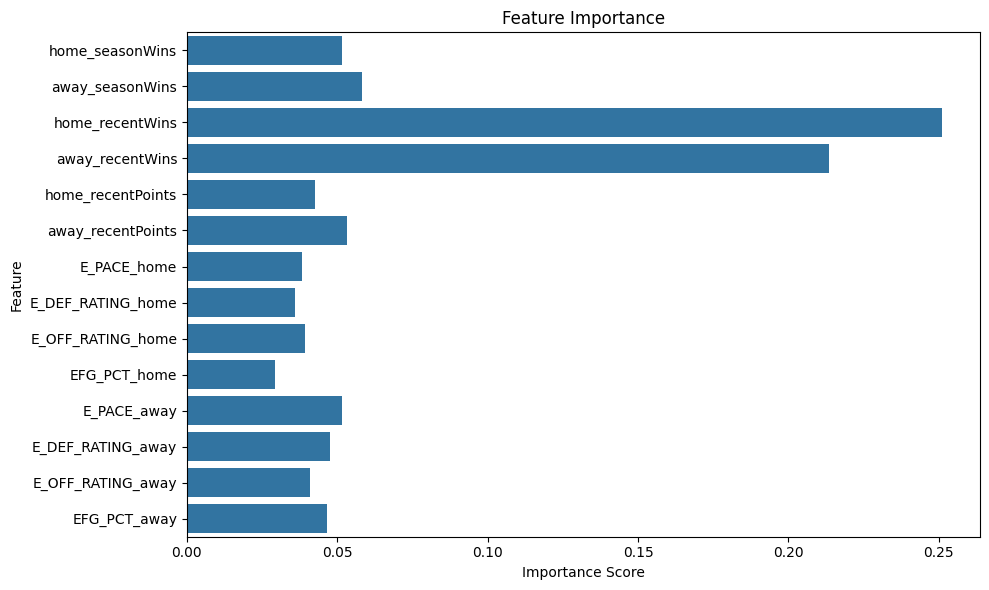

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("data/your_final_games_data.csv")

features = [
    'home_seasonWins', 'away_seasonWins',
    'home_recentWins', 'away_recentWins',
    'home_recentPoints', 'away_recentPoints',
    'E_PACE_home', 'E_DEF_RATING_home', 'E_OFF_RATING_home', 'EFG_PCT_home',
    'E_PACE_away', 'E_DEF_RATING_away', 'E_OFF_RATING_away', 'EFG_PCT_away'
]
target = "home_win"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 📊 Feature importance
importance = model.feature_importances_

# Print values
for name, score in zip(features, importance):
    print(f"{name}: {score:.4f}")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



📊 Feature Importance:
              Feature  Importance
0      home_win_score    0.186546
1      away_win_score    0.106023
9   E_DEF_RATING_away    0.100085
10  E_OFF_RATING_away    0.083305
4         E_PACE_home    0.075838
3   away_recentPoints    0.071395
11       EFG_PCT_away    0.071235
5   E_DEF_RATING_home    0.066511
8         E_PACE_away    0.066462
2   home_recentPoints    0.061800
7        EFG_PCT_home    0.055772
6   E_OFF_RATING_home    0.055028


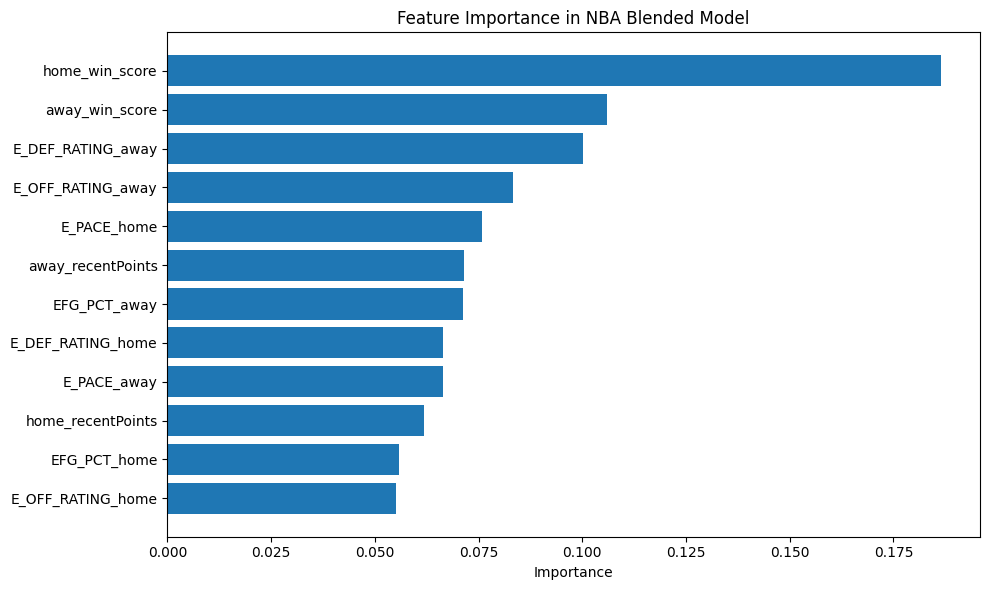

In [2]:
# check_feature_importance.py

import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load your trained model
model = joblib.load("nba_model_api_blended.pkl")

# Get feature names from the training script
features = [
    'home_win_score', 'away_win_score',
    'home_recentPoints', 'away_recentPoints',
    'E_PACE_home', 'E_DEF_RATING_home', 'E_OFF_RATING_home', 'EFG_PCT_home',
    'E_PACE_away', 'E_DEF_RATING_away', 'E_OFF_RATING_away', 'EFG_PCT_away',
]

# Extract feature importances
importance = model.feature_importances_
feature_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display in console
print("\n📊 Feature Importance:")
print(feature_df)

# Optional: plot for visual clarity
plt.figure(figsize=(10,6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importance in NBA Blended Model")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [3]:
# train_model_with_odds.py

import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data/your_final_games_data.csv")

# --- Feature Engineering: Win Scores ---
df["home_win_score"] = df["home_seasonWins"] * df["home_recentWins"]
df["away_win_score"] = df["away_seasonWins"] * df["away_recentWins"]

# --- Define features including odds ---
features = [
    "home_win_score", "away_win_score",
    "home_recentPoints", "away_recentPoints",
    "E_PACE_home", "E_DEF_RATING_home", "E_OFF_RATING_home", "EFG_PCT_home",
    "E_PACE_away", "E_DEF_RATING_away", "E_OFF_RATING_away", "EFG_PCT_away",
    "home_odds", "away_odds"
]

target = "home_win"

X = df[features]
y = df[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "nba_model_with_odds.pkl")

# Feature Importance
importance = model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

print("\n📊 Feature Importance:")
print(feature_importance_df)

# Optional: Plot importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Importance")
plt.title("Feature Importance (Model with Betting Odds)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


KeyError: "['home_odds', 'away_odds'] not in index"

In [4]:
import pandas as pd

df = pd.read_csv("data/your_final_games_data.csv")
print(df.columns.tolist())
print(df[["gameDate", "TEAM_NAME_home", "TEAM_NAME_away"]].head())


['gameId', 'gameDate', 'hometeamCity', 'hometeamName', 'hometeamId', 'awayteamCity', 'awayteamName', 'awayteamId', 'homeScore', 'awayScore', 'winner', 'gameType', 'arenaId', 'pointDifference', 'home_seasonWins', 'home_seasonLosses', 'home_win', 'home_pointsFastBreak', 'home_pointsFromTurnovers', 'home_pointsInThePaint', 'away_seasonWins', 'away_seasonLosses', 'away_win', 'away_pointsFastBreak', 'away_pointsFromTurnovers', 'away_pointsInThePaint', 'home_recentWins', 'home_recentPoints', 'away_recentWins', 'away_recentPoints', 'home_win_pct', 'away_win_pct', 'TEAM_NAME_home', 'GP_home', 'W_home', 'L_home', 'W_PCT_home', 'MIN_home', 'E_OFF_RATING_home', 'OFF_RATING_home', 'E_DEF_RATING_home', 'DEF_RATING_home', 'E_NET_RATING_home', 'NET_RATING_home', 'AST_PCT_home', 'AST_TO_home', 'AST_RATIO_home', 'OREB_PCT_home', 'DREB_PCT_home', 'REB_PCT_home', 'TM_TOV_PCT_home', 'EFG_PCT_home', 'TS_PCT_home', 'E_PACE_home', 'PACE_home', 'PACE_PER40_home', 'POSS_home', 'PIE_home', 'GP_RANK_home', 'W_RA

In [5]:
odds = pd.read_csv("data/nba_historical_odds.csv")
print(odds.columns.tolist())
print(odds[["date", "team", "home/visitor", "opponent", "moneyLine", "opponentMoneyLine"]].head())


['date', 'season', 'team', 'home/visitor', 'opponent', 'score', 'opponentScore', 'moneyLine', 'opponentMoneyLine', 'total', 'spread', 'secondHalfTotal']
         date         team home/visitor      opponent  moneyLine  \
0  2007-10-30         Utah            @  Golden State      100.0   
1  2007-10-30    LA Lakers           vs       Houston      190.0   
2  2007-10-30      Houston            @     LA Lakers     -230.0   
3  2007-10-30  San Antonio           vs      Portland    -1400.0   
4  2007-10-30     Portland            @   San Antonio      900.0   

   opponentMoneyLine  
0             -120.0  
1             -230.0  
2              190.0  
3              900.0  
4            -1400.0  


In [6]:
# inspect_dates.py

import pandas as pd

games = pd.read_csv("data/your_final_games_data.csv")
odds = pd.read_csv("data/nba_historical_odds.csv")

# Convert and print
games["gameDate"] = pd.to_datetime(games["gameDate"])
odds["date"] = pd.to_datetime(odds["date"])

print("📅 Sample game dates:")
print(games["gameDate"].head())

print("\n📅 Sample odds dates:")
print(odds["date"].head())


📅 Sample game dates:
0   2024-10-08 19:30:00
1   2024-10-14 19:30:00
2   2024-10-23 19:30:00
3   2024-10-25 19:30:00
4   2024-10-28 19:30:00
Name: gameDate, dtype: datetime64[ns]

📅 Sample odds dates:
0   2007-10-30
1   2007-10-30
2   2007-10-30
3   2007-10-30
4   2007-10-30
Name: date, dtype: datetime64[ns]


In [7]:
import pandas as pd

raw = pd.read_csv("data/games.csv")
final = pd.read_csv("data/your_final_games_data.csv")

print(f"📊 Raw games: {len(raw)}")
print(f"✅ Final cleaned games: {len(final)}")

# Optional: Check what's missing
missing = set(raw["gameId"]) - set(final["gameId"])
print(f"❌ Missing game IDs: {len(missing)}")


📊 Raw games: 71586
✅ Final cleaned games: 1010
❌ Missing game IDs: 70576


/var/folders/x8/jnhlttvx2fsgtlmzc381j7qc0000gn/T/ipykernel_49261/1456748837.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv("data/games.csv")


In [8]:
import pandas as pd

# Load both datasets
original = pd.read_csv("data/games.csv")
final = pd.read_csv("data/your_final_games_data.csv")

# Compare number of rows
print(f"📊 Original games.csv rows: {len(original)}")
print(f"✅ Cleaned final dataset rows: {len(final)}\n")

# Check for dropped games by ID (if gameId exists)
if 'gameId' in original.columns and 'gameId' in final.columns:
    original_ids = set(original['gameId'])
    final_ids = set(final['gameId'])

    dropped_ids = original_ids - final_ids
    print(f"🗑️ Dropped games: {len(dropped_ids)}")
    if dropped_ids:
        print("📋 Sample dropped game IDs:")
        print(list(dropped_ids)[:5])
else:
    print("⚠️ No 'gameId' column found to match dropped rows.")

# Optional: Save dropped games to CSV
if 'gameId' in original.columns and dropped_ids:
    dropped_games = original[original['gameId'].isin(dropped_ids)]
    dropped_games.to_csv("dropped_games.csv", index=False)
    print("\n📁 Saved dropped games to: dropped_games.csv")


/var/folders/x8/jnhlttvx2fsgtlmzc381j7qc0000gn/T/ipykernel_49261/798688483.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  original = pd.read_csv("data/games.csv")


📊 Original games.csv rows: 71586
✅ Cleaned final dataset rows: 1010

🗑️ Dropped games: 70576
📋 Sample dropped game IDs:
[46400211, 46400212, 46400213, 46400214, 46400221]

📁 Saved dropped games to: dropped_games.csv


In [10]:
import pandas as pd

df = pd.read_csv("data/cleaned_nba_games.csv")
print(df.columns.tolist())

['gameId', 'gameDate', 'hometeamCity', 'hometeamName', 'hometeamId', 'awayteamCity', 'awayteamName', 'awayteamId', 'homeScore', 'awayScore', 'winner', 'gameType', 'arenaId', 'homeWin', 'pointDifference', 'home_seasonWins', 'home_seasonLosses', 'home_win', 'home_pointsFastBreak', 'home_pointsFromTurnovers', 'home_pointsInThePaint', 'away_seasonWins', 'away_seasonLosses', 'away_win', 'away_pointsFastBreak', 'away_pointsFromTurnovers', 'away_pointsInThePaint']


In [3]:
import pandas as pd

# Load the files from the correct paths
games_df = pd.read_csv("data/cleaned_nba_games.csv")
odds_df = pd.read_csv("data/nba_historical_odds.csv")

# Show column names
print("📄 Games Columns:")
print(games_df.columns.tolist())

print("\n📄 Odds Columns:")
print(odds_df.columns.tolist())


📄 Games Columns:
['gameId', 'gameDate', 'hometeamCity', 'hometeamName', 'hometeamId', 'awayteamCity', 'awayteamName', 'awayteamId', 'homeScore', 'awayScore', 'winner', 'gameType', 'arenaId', 'homeWin', 'pointDifference', 'home_seasonWins', 'home_seasonLosses', 'home_win', 'home_pointsFastBreak', 'home_pointsFromTurnovers', 'home_pointsInThePaint', 'away_seasonWins', 'away_seasonLosses', 'away_win', 'away_pointsFastBreak', 'away_pointsFromTurnovers', 'away_pointsInThePaint']

📄 Odds Columns:
['date', 'season', 'team', 'home/visitor', 'opponent', 'score', 'opponentScore', 'moneyLine', 'opponentMoneyLine', 'total', 'spread', 'secondHalfTotal']


In [5]:
import pandas as pd

# Load datasets
games_df = pd.read_csv("data/cleaned_nba_games.csv")
odds_df = pd.read_csv("data/nba_historical_odds.csv")

# Team nickname → odds full name mapping
team_name_map = {
    "clippers": "la clippers", "lakers": "la lakers", "nets": "brooklyn", "hornets": "charlotte",
    "pelicans": "new orleans", "thunder": "oklahoma city", "suns": "phoenix", "blazers": "portland",
    "76ers": "philadelphia", "knicks": "new york", "spurs": "san antonio", "heat": "miami",
    "bucks": "milwaukee", "celtics": "boston", "nuggets": "denver", "warriors": "golden state",
    "cavaliers": "cleveland", "raptors": "toronto", "grizzlies": "memphis", "hawks": "atlanta",
    "kings": "sacramento", "magic": "orlando", "mavericks": "dallas", "pistons": "detroit",
    "rockets": "houston", "bulls": "chicago", "jazz": "utah", "pacers": "indiana",
    "wizards": "washington", "timberwolves": "minnesota", "bobcats": "charlotte", "supersonics": "seattle"
}

# Clean and map team names
games_df["home_clean"] = games_df["hometeamName"].str.strip().str.lower().map(team_name_map)
games_df["away_clean"] = games_df["awayteamName"].str.strip().str.lower().map(team_name_map)
games_df["date_clean"] = pd.to_datetime(games_df["gameDate"]).dt.date

odds_df["team_clean"] = odds_df["team"].str.strip().str.lower()
odds_df["opponent_clean"] = odds_df["opponent"].str.strip().str.lower()
odds_df["date_clean"] = pd.to_datetime(odds_df["date"]).dt.date

# Merge odds for home team
merged_df = pd.merge(
    games_df,
    odds_df,
    how="left",
    left_on=["date_clean", "home_clean", "away_clean"],
    right_on=["date_clean", "team_clean", "opponent_clean"]
)

# Rename betting odds columns
merged_df = merged_df.rename(columns={
    "moneyLine": "home_odds",
    "opponentMoneyLine": "away_odds"
})

# Save
merged_df.to_csv("data/merged_games_with_odds.csv", index=False)

# Report
matched = merged_df["home_odds"].notna().sum()
print(f"✅ Merged dataset saved to: data/merged_games_with_odds.csv")
print(f"📊 Total games: {len(merged_df)}")
print(f"💰 Games with odds: {matched} matched home odds")


✅ Merged dataset saved to: data/merged_games_with_odds.csv
📊 Total games: 71583
💰 Games with odds: 16483 matched home odds


In [6]:
import pandas as pd

# Load the odds dataset
odds_df = pd.read_csv("data/nba_historical_odds.csv")

# Clean and extract unique names
teams = odds_df["team"].str.strip().str.lower().unique()
opponents = odds_df["opponent"].str.strip().str.lower().unique()

# Combine and sort unique values
all_names = sorted(set(teams).union(set(opponents)))

# Print results
print(f"🧠 Total unique names: {len(all_names)}\n")
for name in all_names:
    print("-", name)


🧠 Total unique names: 32

- atlanta
- boston
- brooklyn
- charlotte
- chicago
- cleveland
- dallas
- denver
- detroit
- golden state
- houston
- indiana
- la clippers
- la lakers
- memphis
- miami
- milwaukee
- minnesota
- new jersey
- new orleans
- new york
- oklahoma city
- orlando
- philadelphia
- phoenix
- portland
- sacramento
- san antonio
- seattle
- toronto
- utah
- washington


In [10]:
import pandas as pd
from team_name_mapping import TEAM_NAME_MAPPING

# Load datasets
games_df = pd.read_csv("data/cleaned_nba_games.csv")
odds_df = pd.read_csv("data/nba_historical_odds.csv")

# ✅ Step 1: Clean and standardize names
games_df["home_clean"] = games_df["hometeamName"].str.strip().str.lower().map(TEAM_NAME_MAPPING)
games_df["away_clean"] = games_df["awayteamName"].str.strip().str.lower().map(TEAM_NAME_MAPPING)

odds_df["team_clean"] = odds_df["team"].str.strip().str.lower().map(TEAM_NAME_MAPPING)
odds_df["opponent_clean"] = odds_df["opponent"].str.strip().str.lower().map(TEAM_NAME_MAPPING)

# ✅ Step 2: Convert dates to datetime
games_df["gameDate"] = pd.to_datetime(games_df["gameDate"]).dt.date
odds_df["date"] = pd.to_datetime(odds_df["date"]).dt.date

# ✅ Step 3: Merge home team odds
merged = pd.merge(
    games_df,
    odds_df[["date", "team_clean", "opponent_clean", "moneyLine", "opponentMoneyLine"]],
    how="left",
    left_on=["gameDate", "home_clean", "away_clean"],
    right_on=["date", "team_clean", "opponent_clean"]
)

merged = merged.rename(columns={
    "moneyLine": "home_odds",
    "opponentMoneyLine": "away_odds"
})

# ✅ Step 4: Save the merged dataset
merged.to_csv("data/merged_games_with_odds.csv", index=False)

# ✅ Final Stats
matched_count = merged["home_odds"].notna().sum()
print(f"\n✅ Merged dataset saved to: data/merged_games_with_odds.csv")
print(f"📊 Total games: {len(merged)}")
print(f"💰 Games with odds: {matched_count} matched home odds")


ImportError: cannot import name 'TEAM_NAME_MAPPING' from 'team_name_mapping' (/Users/mk/nba-betting-ai/team_name_mapping.py)

In [12]:
import pandas as pd

# Load datasets
games_df = pd.read_csv("data/cleaned_nba_games.csv")
odds_df = pd.read_csv("data/nba_historical_odds.csv")

# Team nickname → odds full name mapping
team_name_map = {
    "clippers": "la clippers", "lakers": "la lakers", "nets": "brooklyn", "hornets": "charlotte",
    "pelicans": "new orleans", "thunder": "oklahoma city", "suns": "phoenix", "blazers": "portland",
    "76ers": "philadelphia", "knicks": "new york", "spurs": "san antonio", "heat": "miami",
    "bucks": "milwaukee", "celtics": "boston", "nuggets": "denver", "warriors": "golden state",
    "cavaliers": "cleveland", "raptors": "toronto", "grizzlies": "memphis", "hawks": "atlanta",
    "kings": "sacramento", "magic": "orlando", "mavericks": "dallas", "pistons": "detroit",
    "rockets": "houston", "bulls": "chicago", "jazz": "utah", "pacers": "indiana",
    "wizards": "washington", "timberwolves": "minnesota", "bobcats": "charlotte", "supersonics": "seattle"
}

# Clean and map team names
games_df["home_clean"] = games_df["hometeamName"].str.strip().str.lower().map(team_name_map)
games_df["away_clean"] = games_df["awayteamName"].str.strip().str.lower().map(team_name_map)
games_df["date_clean"] = pd.to_datetime(games_df["gameDate"]).dt.date

odds_df["team_clean"] = odds_df["team"].str.strip().str.lower()
odds_df["opponent_clean"] = odds_df["opponent"].str.strip().str.lower()
odds_df["date_clean"] = pd.to_datetime(odds_df["date"]).dt.date

# Merge odds for home team
merged_df = pd.merge(
    games_df,
    odds_df,
    how="left",
    left_on=["date_clean", "home_clean", "away_clean"],
    right_on=["date_clean", "team_clean", "opponent_clean"]
)

# Rename betting odds columns
merged_df = merged_df.rename(columns={
    "moneyLine": "home_odds",
    "opponentMoneyLine": "away_odds"
})

# Save
merged_df.to_csv("data/merged_games_with_odds.csv", index=False)

# Report
matched = merged_df["home_odds"].notna().sum()
print(f"✅ Merged dataset saved to: data/merged_games_with_odds.csv")
print(f"📊 Total games: {len(merged_df)}")
print(f"💰 Games with odds: {matched} matched home odds")


✅ Merged dataset saved to: data/merged_games_with_odds.csv
📊 Total games: 71583
💰 Games with odds: 16483 matched home odds


In [13]:
import pandas as pd

# Load your cleaned games dataset
games_df = pd.read_csv("data/cleaned_nba_games.csv")

# Get all unique home and away team names (raw)
home_names = games_df["hometeamName"].dropna().str.strip().str.lower().unique()
away_names = games_df["awayteamName"].dropna().str.strip().str.lower().unique()

# Combine and sort all unique names
all_team_names = sorted(set(home_names).union(set(away_names)))

# Print them
print("🏀 Unique team names in cleaned_nba_games.csv:\n")
for name in all_team_names:
    print("-", name)


🏀 Unique team names in cleaned_nba_games.csv:

- 76ers
- blackhawks
- bobcats
- braves
- bucks
- bullets
- bulls
- cavaliers
- celtics
- clippers
- grizzlies
- hawks
- heat
- hornets
- jazz
- kings
- knicks
- lakers
- magic
- mavericks
- nationals
- nets
- nuggets
- pacers
- packers
- pelicans
- pistons
- raptors
- rockets
- royals
- spurs
- suns
- supersonics
- thunder
- timberwolves
- trail blazers
- warriors
- wizards
- zephyrs


In [14]:
import pandas as pd

# Load cleaned games and odds
games_df = pd.read_csv("data/cleaned_nba_games.csv")
odds_df = pd.read_csv("data/nba_historical_odds.csv")

# Team name mapping (nickname → standardized odds format)
TEAM_NAME_MAPPING = {
    "hawks": "atlanta", "celtics": "boston", "nets": "brooklyn", "hornets": "charlotte",
    "bulls": "chicago", "cavaliers": "cleveland", "mavericks": "dallas", "nuggets": "denver",
    "pistons": "detroit", "warriors": "golden state", "rockets": "houston", "pacers": "indiana",
    "clippers": "la clippers", "lakers": "la lakers", "grizzlies": "memphis", "heat": "miami",
    "bucks": "milwaukee", "timberwolves": "minnesota", "pelicans": "new orleans", "knicks": "new york",
    "thunder": "oklahoma city", "magic": "orlando", "76ers": "philadelphia", "suns": "phoenix",
    "trail blazers": "portland", "kings": "sacramento", "spurs": "san antonio", "raptors": "toronto",
    "jazz": "utah", "wizards": "washington",

    # Historical/Legacy Teams
    "bobcats": "charlotte", "zephyrs": "washington", "bullets": "washington",
    "braves": "la clippers", "royals": "sacramento", "blackhawks": "atlanta",
    "packers": "washington", "supersonics": "oklahoma city", "nationals": "philadelphia"
}

# 🧹 Clean and map team names
games_df["home_clean"] = games_df["hometeamName"].str.strip().str.lower().map(TEAM_NAME_MAPPING)
games_df["away_clean"] = games_df["awayteamName"].str.strip().str.lower().map(TEAM_NAME_MAPPING)
games_df["date_clean"] = pd.to_datetime(games_df["gameDate"]).dt.date

odds_df["team_clean"] = odds_df["team"].str.strip().str.lower()
odds_df["opponent_clean"] = odds_df["opponent"].str.strip().str.lower()
odds_df["date_clean"] = pd.to_datetime(odds_df["date"]).dt.date

# 🧠 Merge games with betting odds (home team match)
merged_df = pd.merge(
    games_df,
    odds_df,
    how="left",
    left_on=["date_clean", "home_clean", "away_clean"],
    right_on=["date_clean", "team_clean", "opponent_clean"]
)

# 🎯 Rename for clarity
merged_df = merged_df.rename(columns={
    "moneyLine": "home_odds",
    "opponentMoneyLine": "away_odds"
})

# 💾 Save result
output_path = "data/merged_games_with_odds.csv"
merged_df.to_csv(output_path, index=False)

# ✅ Report match rate
matched = merged_df["home_odds"].notna().sum()
print(f"\n✅ Merged dataset saved to: {output_path}")
print(f"📊 Total games: {len(merged_df)}")
print(f"💰 Games with odds: {matched} matched home odds")



✅ Merged dataset saved to: data/merged_games_with_odds.csv
📊 Total games: 71583
💰 Games with odds: 17614 matched home odds


In [15]:
import pandas as pd

df = pd.read_csv("data/merged_games_with_odds.csv")
print(df[["gameDate", "hometeamName", "awayteamName", "home_odds", "away_odds"]].dropna().sample(5))


                  gameDate hometeamName awayteamName  home_odds  away_odds
20274  2010-03-31 20:30:00        Spurs      Rockets     -800.0      550.0
5550   2021-04-21 19:00:00        76ers         Suns      135.0     -155.0
19685  2010-12-03 21:00:00         Suns       Pacers     -120.0      100.0
13911  2015-01-28 21:00:00         Jazz     Clippers      260.0     -320.0
5809   2021-03-19 20:00:00         Heat       Pacers     -180.0      160.0


/var/folders/x8/jnhlttvx2fsgtlmzc381j7qc0000gn/T/ipykernel_53324/2472471782.py:3: DtypeWarning: Columns (30,32,33,34,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/merged_games_with_odds.csv")


In [16]:
# train_model_with_odds_api.py

import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Load merged dataset
df = pd.read_csv("data/merged_games_with_odds.csv", low_memory=False)

# Drop rows with missing odds
df = df.dropna(subset=["home_odds", "away_odds"])

# Convert odds to numeric (if needed)
df["home_odds"] = pd.to_numeric(df["home_odds"], errors="coerce")
df["away_odds"] = pd.to_numeric(df["away_odds"], errors="coerce")

# Drop rows with any still-missing odds
df = df.dropna(subset=["home_odds", "away_odds"])

# Fill missing API features with fallback/defaults
api_features = [
    'home_win_pct', 'away_win_pct', 'home_recentPoints', 'away_recentPoints',
    'E_PACE_home', 'E_DEF_RATING_home', 'E_OFF_RATING_home', 'EFG_PCT_home',
    'E_PACE_away', 'E_DEF_RATING_away', 'E_OFF_RATING_away', 'EFG_PCT_away'
]

for col in api_features:
    if col not in df.columns:
        df[col] = 0.5 if "win_pct" in col else 110.0  # fallback for missing data
    else:
        df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0.5 if "win_pct" in col else 110.0)

# Feature set
features = [
    'home_win_pct', 'away_win_pct', 'home_recentPoints', 'away_recentPoints',
    'E_PACE_home', 'E_DEF_RATING_home', 'E_OFF_RATING_home', 'EFG_PCT_home',
    'E_PACE_away', 'E_DEF_RATING_away', 'E_OFF_RATING_away', 'EFG_PCT_away',
    'home_odds', 'away_odds'
]

target = "home_win"

# Prepare X, y
X = df[features]
y = df[target]

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "nba_model_with_odds.pkl")

# Feature importance
importance = pd.DataFrame({
    "Feature": features,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n📊 Feature Importance:")
print(importance)



📊 Feature Importance:
              Feature  Importance
13          away_odds    0.645056
12          home_odds    0.354944
0        home_win_pct    0.000000
1        away_win_pct    0.000000
2   home_recentPoints    0.000000
3   away_recentPoints    0.000000
4         E_PACE_home    0.000000
5   E_DEF_RATING_home    0.000000
6   E_OFF_RATING_home    0.000000
7        EFG_PCT_home    0.000000
8         E_PACE_away    0.000000
9   E_DEF_RATING_away    0.000000
10  E_OFF_RATING_away    0.000000
11       EFG_PCT_away    0.000000


/Users/mk/nba-betting-ai/nba-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:16:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib

# Load data
df = pd.read_csv("data/merged_games_with_odds.csv", low_memory=False)

# Define features (including betting odds)
features = [
    "home_win_pct", "away_win_pct",
    "home_recentPoints", "away_recentPoints",
    "E_PACE_home", "E_DEF_RATING_home", "E_OFF_RATING_home", "EFG_PCT_home",
    "E_PACE_away", "E_DEF_RATING_away", "E_OFF_RATING_away", "EFG_PCT_away",
    "home_odds", "away_odds"
]

target = "home_win"

# Fill missing columns with fallback values
fallback_values = {
    "home_win_pct": 0.5,
    "away_win_pct": 0.5,
    "home_recentPoints": 100.0,
    "away_recentPoints": 100.0,
    "E_PACE_home": 100.0,
    "E_DEF_RATING_home": 110.0,
    "E_OFF_RATING_home": 110.0,
    "EFG_PCT_home": 0.5,
    "E_PACE_away": 100.0,
    "E_DEF_RATING_away": 110.0,
    "E_OFF_RATING_away": 110.0,
    "EFG_PCT_away": 0.5,
    "home_odds": 0,
    "away_odds": 0
}

for col, fallback in fallback_values.items():
    if col not in df.columns:
        print(f"🧱 Adding missing column: {col}")
        df[col] = fallback

# Drop any rows with missing target
df = df.dropna(subset=[target])

# Define X and y
X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "nba_model_with_odds.pkl")

print("✅ Model trained and saved as nba_model_with_odds.pkl")


🧱 Adding missing column: home_win_pct
🧱 Adding missing column: away_win_pct
🧱 Adding missing column: home_recentPoints
🧱 Adding missing column: away_recentPoints
🧱 Adding missing column: E_PACE_home
🧱 Adding missing column: E_DEF_RATING_home
🧱 Adding missing column: E_OFF_RATING_home
🧱 Adding missing column: EFG_PCT_home
🧱 Adding missing column: E_PACE_away
🧱 Adding missing column: E_DEF_RATING_away
🧱 Adding missing column: E_OFF_RATING_away
🧱 Adding missing column: EFG_PCT_away
✅ Model trained and saved as nba_model_with_odds.pkl


/Users/mk/nba-betting-ai/nba-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:17:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [22]:
# merge_odds_into_final_data.py

import pandas as pd

# Load your full dataset with advanced features
games_df = pd.read_csv("data/your_final_games_data.csv")
odds_df = pd.read_csv("data/nba_historical_odds.csv")

# 🧼 Clean team names
games_df["home_clean"] = games_df["TEAM_NAME_home"].str.strip().str.lower()
games_df["away_clean"] = games_df["TEAM_NAME_away"].str.strip().str.lower()
games_df["date_clean"] = pd.to_datetime(games_df["gameDate"]).dt.date

odds_df["team_clean"] = odds_df["team"].str.strip().str.lower()
odds_df["opponent_clean"] = odds_df["opponent"].str.strip().str.lower()
odds_df["date_clean"] = pd.to_datetime(odds_df["date"]).dt.date

# ✅ Merge odds for home teams
merged_df = pd.merge(
    games_df,
    odds_df[["date_clean", "team_clean", "opponent_clean", "moneyLine", "opponentMoneyLine"]],
    how="left",
    left_on=["date_clean", "home_clean", "away_clean"],
    right_on=["date_clean", "team_clean", "opponent_clean"]
)

# 🎯 Rename odds columns
merged_df = merged_df.rename(columns={
    "moneyLine": "home_odds",
    "opponentMoneyLine": "away_odds"
})

# 🧼 Drop helper columns
merged_df.drop(columns=["home_clean", "away_clean", "team_clean", "opponent_clean", "date_clean"], inplace=True)

# 💾 Save
merged_df.to_csv("data/your_final_games_with_odds.csv", index=False)

print("✅ your_final_games_with_odds.csv created with odds merged into full feature set.")


✅ your_final_games_with_odds.csv created with odds merged into full feature set.


In [23]:
# get_advanced_team_stats.py
import pandas as pd
from nba_api.stats.endpoints import leaguedashteamstats
import time

def get_advanced_stats_for_seasons(start_year=2000, end_year=2025):
    all_stats = []

    for year in range(start_year, end_year):
        print(f"Getting advanced stats for {year}-{year+1} season...")
        season_str = f"{year}-{str(year + 1)[-2:]}"
        try:
            stats = leaguedashteamstats.LeagueDashTeamStats(
                season=season_str,
                measure_type_detailed_defense='Advanced',
                per_mode_detailed='PerGame'
            ).get_data_frames()[0]
            stats['SEASON'] = season_str
            all_stats.append(stats)
            time.sleep(1)  # Respect API rate limits
        except Exception as e:
            print(f"Failed for {season_str}: {e}")

    df = pd.concat(all_stats, ignore_index=True)
    df.to_csv("team_advanced_stats.csv", index=False)
    print("✅ Saved team_advanced_stats.csv")
    return df

if __name__ == "__main__":
    get_advanced_stats_for_seasons(2000, 2025)


Getting advanced stats for 2000-2001 season...
Getting advanced stats for 2001-2002 season...
Getting advanced stats for 2002-2003 season...
Getting advanced stats for 2003-2004 season...
Getting advanced stats for 2004-2005 season...
Getting advanced stats for 2005-2006 season...
Getting advanced stats for 2006-2007 season...
Getting advanced stats for 2007-2008 season...
Getting advanced stats for 2008-2009 season...
Getting advanced stats for 2009-2010 season...
Getting advanced stats for 2010-2011 season...
Getting advanced stats for 2011-2012 season...
Getting advanced stats for 2012-2013 season...
Getting advanced stats for 2013-2014 season...
Getting advanced stats for 2014-2015 season...
Getting advanced stats for 2015-2016 season...
Getting advanced stats for 2016-2017 season...
Getting advanced stats for 2017-2018 season...
Getting advanced stats for 2018-2019 season...
Getting advanced stats for 2019-2020 season...
Getting advanced stats for 2020-2021 season...
Getting advan

In [1]:
import pandas as pd

df = pd.read_csv("data/merged_games_with_odds.csv")
print(df.columns.tolist())


['gameId', 'gameDate', 'hometeamCity', 'hometeamName', 'hometeamId', 'awayteamCity', 'awayteamName', 'awayteamId', 'homeScore', 'awayScore', 'winner', 'gameType', 'arenaId', 'homeWin', 'pointDifference', 'home_seasonWins', 'home_seasonLosses', 'home_win', 'home_pointsFastBreak', 'home_pointsFromTurnovers', 'home_pointsInThePaint', 'away_seasonWins', 'away_seasonLosses', 'away_win', 'away_pointsFastBreak', 'away_pointsFromTurnovers', 'away_pointsInThePaint', 'home_clean', 'away_clean', 'date_clean', 'date', 'season', 'team', 'home/visitor', 'opponent', 'score', 'opponentScore', 'home_odds', 'away_odds', 'total', 'spread', 'secondHalfTotal', 'team_clean', 'opponent_clean']


/var/folders/x8/jnhlttvx2fsgtlmzc381j7qc0000gn/T/ipykernel_55715/1171740696.py:3: DtypeWarning: Columns (30,32,33,34,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/merged_games_with_odds.csv")


In [1]:
import pandas as pd

df = pd.read_csv("data/final_games_full_features.csv", low_memory=False)
print(df.columns.tolist())
print(f"Total rows: {len(df)}")


['gameId', 'gameDate', 'hometeamCity', 'hometeamName', 'hometeamId', 'awayteamCity', 'awayteamName', 'awayteamId', 'homeScore', 'awayScore', 'winner', 'gameType', 'arenaId', 'homeWin', 'pointDifference', 'home_seasonWins', 'home_seasonLosses', 'home_win', 'home_pointsFastBreak', 'home_pointsFromTurnovers', 'home_pointsInThePaint', 'away_seasonWins', 'away_seasonLosses', 'away_win', 'away_pointsFastBreak', 'away_pointsFromTurnovers', 'away_pointsInThePaint', 'home_clean', 'away_clean', 'date_clean', 'date', 'season', 'team', 'home/visitor', 'opponent', 'score', 'opponentScore', 'home_odds', 'away_odds', 'total', 'spread', 'secondHalfTotal', 'team_clean', 'opponent_clean', 'home_TEAM_ID', 'home_GP', 'home_W', 'home_L', 'home_W_PCT', 'home_MIN', 'home_E_OFF_RATING', 'home_OFF_RATING', 'home_E_DEF_RATING', 'home_DEF_RATING', 'home_E_NET_RATING', 'home_NET_RATING', 'home_AST_PCT', 'home_AST_TO', 'home_AST_RATIO', 'home_OREB_PCT', 'home_DREB_PCT', 'home_REB_PCT', 'home_TM_TOV_PCT', 'home_EFG

In [2]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib

# === Load Data ===
df = pd.read_csv("data/final_games_full_features.csv")
df_raw = df.copy()

# === Fill recent stats with neutral values ===
df["home_recent_win_pct"] = df["home_recent_win_pct"].fillna(0.5)
df["away_recent_win_pct"] = df["away_recent_win_pct"].fillna(0.5)

df["home_recent_avg_pts"] = df["home_recent_avg_pts"].fillna(df["home_recent_avg_pts"].median())
df["away_recent_avg_pts"] = df["away_recent_avg_pts"].fillna(df["away_recent_avg_pts"].median())

# === Drop rows missing core features (advanced stats or odds) ===
required_features = [
    "home_OFF_RATING", "away_OFF_RATING",
    "home_DEF_RATING", "away_DEF_RATING",
    "home_EFG_PCT", "away_EFG_PCT",
    "home_odds", "away_odds"
]
df = df.dropna(subset=required_features)

print(f"✅ Training on {len(df)} rows (from original {len(df_raw)})")

# === Define target ===
y = df["home_win"]

required_features = [
    "home_OFF_RATING", "away_OFF_RATING",
    "home_DEF_RATING", "away_DEF_RATING",
    "home_EFG_PCT", "away_EFG_PCT",
    "home_odds", "away_odds"
]

print("\n🔍 Checking missing values:")
for col in required_features:
    if col not in df.columns:
        print(f"❌ Missing column: {col}")
    else:
        nulls = df[col].isnull().sum()
        print(f"{col}: {nulls} nulls")

# Now only drop rows where all required columns are present
existing_required = [col for col in required_features if col in df.columns]
df = df.dropna(subset=existing_required)

print(f"\n✅ Training on {len(df)} rows (from original {len(df_raw)})")

X = df[features]

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# === Train model ===
model = XGBClassifier(
    n_estimators=250,
    learning_rate=0.08,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

# === Evaluate ===
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# === Save model ===
joblib.dump(model, "nba_model_v3.pkl")
print("✅ Model saved as nba_model_v3.pkl")


/var/folders/x8/jnhlttvx2fsgtlmzc381j7qc0000gn/T/ipykernel_56168/153088878.py:8: DtypeWarning: Columns (30,32,33,34,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/final_games_full_features.csv")


✅ Training on 0 rows (from original 71649)

🔍 Checking missing values:
home_OFF_RATING: 0 nulls
away_OFF_RATING: 0 nulls
home_DEF_RATING: 0 nulls
away_DEF_RATING: 0 nulls
home_EFG_PCT: 0 nulls
away_EFG_PCT: 0 nulls
home_odds: 0 nulls
away_odds: 0 nulls

✅ Training on 0 rows (from original 71649)


NameError: name 'features' is not defined

In [3]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib

# === Load Data ===
df = pd.read_csv("data/final_games_full_features.csv", low_memory=False)
df_raw = df.copy()

# === Fill recent stats with neutral values ===
df["home_recent_win_pct"] = df["home_recent_win_pct"].fillna(0.5)
df["away_recent_win_pct"] = df["away_recent_win_pct"].fillna(0.5)
df["home_recent_avg_pts"] = df["home_recent_avg_pts"].fillna(df["home_recent_avg_pts"].median())
df["away_recent_avg_pts"] = df["away_recent_avg_pts"].fillna(df["away_recent_avg_pts"].median())

# === Drop rows with missing core features (ADV STATS + ODDS) ===
required_features = [
    "home_OFF_RATING", "away_OFF_RATING",
    "home_DEF_RATING", "away_DEF_RATING",
    "home_EFG_PCT", "away_EFG_PCT",
    "home_odds", "away_odds"
]

print("\n🔍 Checking missing values:")
for col in required_features:
    if col not in df.columns:
        print(f"❌ Missing column: {col}")
    else:
        nulls = df[col].isnull().sum()
        print(f"{col}: {nulls} nulls")

existing_required = [col for col in required_features if col in df.columns]
df = df.dropna(subset=existing_required)

print(f"\n✅ Training on {len(df)} rows (from original {len(df_raw)})")

# === Define Features and Label AFTER filtering ===
features = [
    "home_seasonWins", "away_seasonWins",
    "home_recent_win_pct", "away_recent_win_pct",
    "home_recent_avg_pts", "away_recent_avg_pts",
    "home_OFF_RATING", "away_OFF_RATING",
    "home_DEF_RATING", "away_DEF_RATING",
    "home_EFG_PCT", "away_EFG_PCT",
    "home_PACE", "away_PACE",
    "home_odds", "away_odds"
]
X = df[features]
y = df["home_win"]

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# === Train the model ===
model = XGBClassifier(
    n_estimators=250,
    learning_rate=0.08,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

# === Evaluate the model ===
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# === Save the model ===
joblib.dump(model, "nba_model_v3.pkl")
print("✅ Model saved as nba_model_v3.pkl")



🔍 Checking missing values:
home_OFF_RATING: 71649 nulls
away_OFF_RATING: 71649 nulls
home_DEF_RATING: 71649 nulls
away_DEF_RATING: 71649 nulls
home_EFG_PCT: 71649 nulls
away_EFG_PCT: 71649 nulls
home_odds: 54035 nulls
away_odds: 54035 nulls

✅ Training on 0 rows (from original 71649)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [4]:
import pandas as pd
adv = pd.read_csv("team_advanced_stats.csv")
print(adv["TEAM_NAME"].unique())


['Atlanta Hawks' 'Boston Celtics' 'Charlotte Hornets' 'Chicago Bulls'
 'Cleveland Cavaliers' 'Dallas Mavericks' 'Denver Nuggets'
 'Detroit Pistons' 'Golden State Warriors' 'Houston Rockets'
 'Indiana Pacers' 'Los Angeles Clippers' 'Los Angeles Lakers' 'Miami Heat'
 'Milwaukee Bucks' 'Minnesota Timberwolves' 'New Jersey Nets'
 'New York Knicks' 'Orlando Magic' 'Philadelphia 76ers' 'Phoenix Suns'
 'Portland Trail Blazers' 'Sacramento Kings' 'San Antonio Spurs'
 'Seattle SuperSonics' 'Toronto Raptors' 'Utah Jazz' 'Vancouver Grizzlies'
 'Washington Wizards' 'Memphis Grizzlies' 'New Orleans Hornets'
 'Charlotte Bobcats' 'New Orleans/Oklahoma City Hornets'
 'Oklahoma City Thunder' 'Brooklyn Nets' 'New Orleans Pelicans'
 'LA Clippers']


In [5]:
# test_team_name_mapping.py
from team_name_mapping import TEAM_NAME_MAPPING

# Sample short names from your data
test_teams = [
    "atlanta", "boston", "brooklyn", "charlotte", "chicago",
    "cleveland", "dallas", "denver", "detroit", "golden state",
    "houston", "indiana", "la clippers", "la lakers", "memphis",
    "miami", "milwaukee", "minnesota", "new jersey", "new orleans",
    "new york", "oklahoma city", "orlando", "philadelphia", "phoenix",
    "portland", "sacramento", "san antonio", "seattle", "toronto",
    "utah", "washington"
]

# Run test
print("🔍 Testing team name mapping...\n")
for short_name in test_teams:
    full_name = TEAM_NAME_MAPPING.get(short_name)
    if full_name:
        print(f"{short_name} ➜ {full_name}")
    else:
        print(f"❌ {short_name} ➜ NOT FOUND")

print("\n✅ Mapping test complete.")


🔍 Testing team name mapping...

atlanta ➜ Atlanta Hawks
boston ➜ Boston Celtics
brooklyn ➜ Brooklyn Nets
charlotte ➜ Charlotte Hornets
chicago ➜ Chicago Bulls
cleveland ➜ Cleveland Cavaliers
dallas ➜ Dallas Mavericks
denver ➜ Denver Nuggets
detroit ➜ Detroit Pistons
golden state ➜ Golden State Warriors
houston ➜ Houston Rockets
indiana ➜ Indiana Pacers
la clippers ➜ LA Clippers
la lakers ➜ Los Angeles Lakers
memphis ➜ Memphis Grizzlies
miami ➜ Miami Heat
milwaukee ➜ Milwaukee Bucks
minnesota ➜ Minnesota Timberwolves
new jersey ➜ New Jersey Nets
new orleans ➜ New Orleans Pelicans
new york ➜ New York Knicks
oklahoma city ➜ Oklahoma City Thunder
orlando ➜ Orlando Magic
philadelphia ➜ Philadelphia 76ers
phoenix ➜ Phoenix Suns
portland ➜ Portland Trail Blazers
sacramento ➜ Sacramento Kings
san antonio ➜ San Antonio Spurs
seattle ➜ Seattle SuperSonics
toronto ➜ Toronto Raptors
utah ➜ Utah Jazz
washington ➜ Washington Wizards

✅ Mapping test complete.



🔍 Checking missing values:
home_OFF_RATING: 54601 nulls
away_OFF_RATING: 54600 nulls
home_DEF_RATING: 54601 nulls
away_DEF_RATING: 54600 nulls
home_EFG_PCT: 54601 nulls
away_EFG_PCT: 54600 nulls
home_odds: 54035 nulls
away_odds: 54035 nulls

✅ Training on 16496 rows (from original 71649)


/Users/mk/nba-betting-ai/nba-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:30:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Accuracy: 0.6733
              precision    recall  f1-score   support

           0       0.65      0.56      0.60      1452
           1       0.69      0.77      0.72      1848

    accuracy                           0.67      3300
   macro avg       0.67      0.66      0.66      3300
weighted avg       0.67      0.67      0.67      3300

✅ Model saved as nba_model_v3.pkl

📊 Feature Importances:
                feature  importance
15            away_odds    0.345536
14            home_odds    0.192522
8       home_DEF_RATING    0.044791
6       home_OFF_RATING    0.044348
9       away_DEF_RATING    0.040746
3   away_recent_win_pct    0.038400
10         home_EFG_PCT    0.038097
7       away_OFF_RATING    0.037978
11         away_EFG_PCT    0.037927
2   home_recent_win_pct    0.036371
5   away_recent_avg_pts    0.036358
12            home_PACE    0.036114
13            away_PACE    0.035443
4   home_recent_avg_pts    0.035368
0       home_seasonWins    0.000000
1       away_season

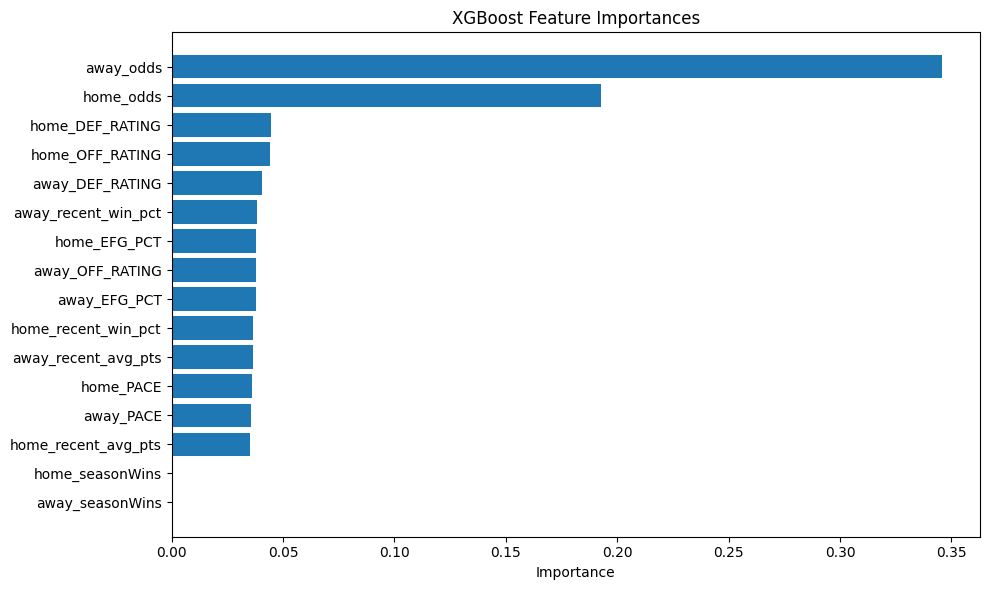

In [7]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib

# === Load Data ===
df = pd.read_csv("data/final_games_full_features.csv", low_memory=False)
df_raw = df.copy()

# === Fill recent stats with neutral values ===
df["home_recent_win_pct"] = df["home_recent_win_pct"].fillna(0.5)
df["away_recent_win_pct"] = df["away_recent_win_pct"].fillna(0.5)
df["home_recent_avg_pts"] = df["home_recent_avg_pts"].fillna(df["home_recent_avg_pts"].median())
df["away_recent_avg_pts"] = df["away_recent_avg_pts"].fillna(df["away_recent_avg_pts"].median())

# === Drop rows missing core features (ADV STATS + ODDS) ===
required_features = [
    "home_OFF_RATING", "away_OFF_RATING",
    "home_DEF_RATING", "away_DEF_RATING",
    "home_EFG_PCT", "away_EFG_PCT",
    "home_odds", "away_odds"
]

print("\n🔍 Checking missing values:")
for col in required_features:
    if col not in df.columns:
        print(f"❌ Missing column: {col}")
    else:
        nulls = df[col].isnull().sum()
        print(f"{col}: {nulls} nulls")

existing_required = [col for col in required_features if col in df.columns]
df = df.dropna(subset=existing_required)

print(f"\n✅ Training on {len(df)} rows (from original {len(df_raw)})")

# === Define features and label ===
features = [
    "home_seasonWins", "away_seasonWins",
    "home_recent_win_pct", "away_recent_win_pct",
    "home_recent_avg_pts", "away_recent_avg_pts",
    "home_OFF_RATING", "away_OFF_RATING",
    "home_DEF_RATING", "away_DEF_RATING",
    "home_EFG_PCT", "away_EFG_PCT",
    "home_PACE", "away_PACE",
    "home_odds", "away_odds"
]

X = df[features]
y = df["home_win"]

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# === Train XGBoost model ===
model = XGBClassifier(
    n_estimators=250,
    learning_rate=0.08,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

# === Evaluate performance ===
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# === Save model ===
joblib.dump(model, "nba_model_v3.pkl")
print("✅ Model saved as nba_model_v3.pkl")

import matplotlib.pyplot as plt

# === Feature importance plot
importance = model.feature_importances_
importance_df = pd.DataFrame({
    "feature": features,
    "importance": importance
}).sort_values(by="importance", ascending=False)

print("\n📊 Feature Importances:")
print(importance_df)

# Optional: plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df["feature"], importance_df["importance"])
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



🔍 Checking missing values:
home_OFF_RATING: 54601 nulls
away_OFF_RATING: 54600 nulls
home_DEF_RATING: 54601 nulls
away_DEF_RATING: 54600 nulls
home_EFG_PCT: 54601 nulls
away_EFG_PCT: 54600 nulls
home_odds: 54035 nulls
away_odds: 54035 nulls

✅ Training on 16496 rows (from original 71649)


/Users/mk/nba-betting-ai/nba-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:40:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Accuracy: 0.6733
              precision    recall  f1-score   support

           0       0.65      0.56      0.60      1452
           1       0.69      0.77      0.72      1848

    accuracy                           0.67      3300
   macro avg       0.67      0.66      0.66      3300
weighted avg       0.67      0.67      0.67      3300

✅ Model saved as nba_model_v3.pkl

📊 Feature Importances:
                feature  importance
16            away_odds    0.345536
15            home_odds    0.192522
9       home_DEF_RATING    0.044791
7       home_OFF_RATING    0.044348
10      away_DEF_RATING    0.040746
4   away_recent_win_pct    0.038400
11         home_EFG_PCT    0.038097
8       away_OFF_RATING    0.037978
12         away_EFG_PCT    0.037927
3   home_recent_win_pct    0.036371
6   away_recent_avg_pts    0.036358
13            home_PACE    0.036114
14            away_PACE    0.035443
5   home_recent_avg_pts    0.035368
1     away_seasonWinPct    0.000000
2       season_win_

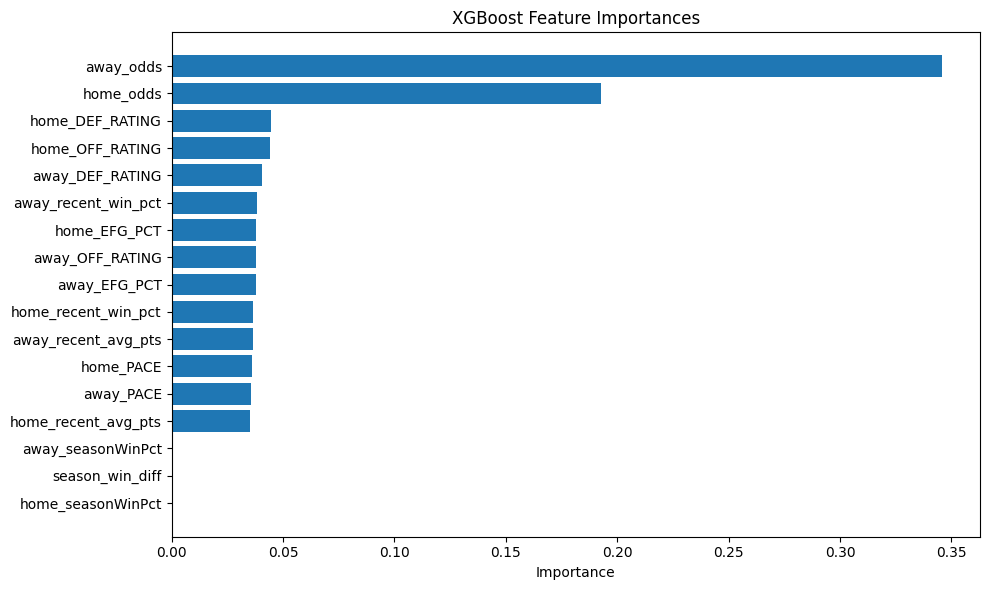

In [8]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("data/final_games_full_features.csv", low_memory=False)
df_raw = df.copy()

# === Add win percentage features ===
df["home_seasonWinPct"] = df["home_seasonWins"] / (df["home_seasonWins"] + df["home_seasonLosses"])
df["away_seasonWinPct"] = df["away_seasonWins"] / (df["away_seasonWins"] + df["away_seasonLosses"])
df["season_win_diff"] = df["home_seasonWinPct"] - df["away_seasonWinPct"]

# === Fill recent stats with neutral values ===
df["home_recent_win_pct"] = df["home_recent_win_pct"].fillna(0.5)
df["away_recent_win_pct"] = df["away_recent_win_pct"].fillna(0.5)
df["home_recent_avg_pts"] = df["home_recent_avg_pts"].fillna(df["home_recent_avg_pts"].median())
df["away_recent_avg_pts"] = df["away_recent_avg_pts"].fillna(df["away_recent_avg_pts"].median())

# === Drop rows missing core features (ADV STATS + ODDS) ===
required_features = [
    "home_OFF_RATING", "away_OFF_RATING",
    "home_DEF_RATING", "away_DEF_RATING",
    "home_EFG_PCT", "away_EFG_PCT",
    "home_odds", "away_odds"
]

print("\n🔍 Checking missing values:")
for col in required_features:
    if col not in df.columns:
        print(f"❌ Missing column: {col}")
    else:
        nulls = df[col].isnull().sum()
        print(f"{col}: {nulls} nulls")

existing_required = [col for col in required_features if col in df.columns]
df = df.dropna(subset=existing_required)

print(f"\n✅ Training on {len(df)} rows (from original {len(df_raw)})")

# === Define features and label ===
features = [
    "home_seasonWinPct", "away_seasonWinPct", "season_win_diff",
    "home_recent_win_pct", "away_recent_win_pct",
    "home_recent_avg_pts", "away_recent_avg_pts",
    "home_OFF_RATING", "away_OFF_RATING",
    "home_DEF_RATING", "away_DEF_RATING",
    "home_EFG_PCT", "away_EFG_PCT",
    "home_PACE", "away_PACE",
    "home_odds", "away_odds"
]

X = df[features]
y = df["home_win"]

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# === Train model ===
model = XGBClassifier(
    n_estimators=250,
    learning_rate=0.08,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

# === Evaluate model ===
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# === Save model ===
joblib.dump(model, "nba_model_v3.pkl")
print("✅ Model saved as nba_model_v3.pkl")

# === Feature importance chart ===
importance = model.feature_importances_
importance_df = pd.DataFrame({
    "feature": features,
    "importance": importance
}).sort_values(by="importance", ascending=False)

print("\n📊 Feature Importances:")
print(importance_df)

# Optional: plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df["feature"], importance_df["importance"])
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



🔍 Checking missing values:
home_OFF_RATING: 54601 nulls
away_OFF_RATING: 54600 nulls
home_DEF_RATING: 54601 nulls
away_DEF_RATING: 54600 nulls
home_EFG_PCT: 54601 nulls
away_EFG_PCT: 54600 nulls

✅ Training on 16496 rows (from original 71649)


/Users/mk/nba-betting-ai/nba-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:46:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Accuracy (no odds): 0.6776
              precision    recall  f1-score   support

           0       0.66      0.55      0.60      1452
           1       0.69      0.78      0.73      1848

    accuracy                           0.68      3300
   macro avg       0.67      0.66      0.67      3300
weighted avg       0.68      0.68      0.67      3300


📊 Feature Importances:
                feature  importance
7       home_OFF_RATING    0.159204
9       home_DEF_RATING    0.131831
8       away_OFF_RATING    0.128514
10      away_DEF_RATING    0.115823
3   home_recent_win_pct    0.099220
12         away_EFG_PCT    0.069606
4   away_recent_win_pct    0.057732
11         home_EFG_PCT    0.056435
13            home_PACE    0.047239
14            away_PACE    0.046399
6   away_recent_avg_pts    0.045170
5   home_recent_avg_pts    0.042829
0     home_seasonWinPct    0.000000
1     away_seasonWinPct    0.000000
2       season_win_diff    0.000000


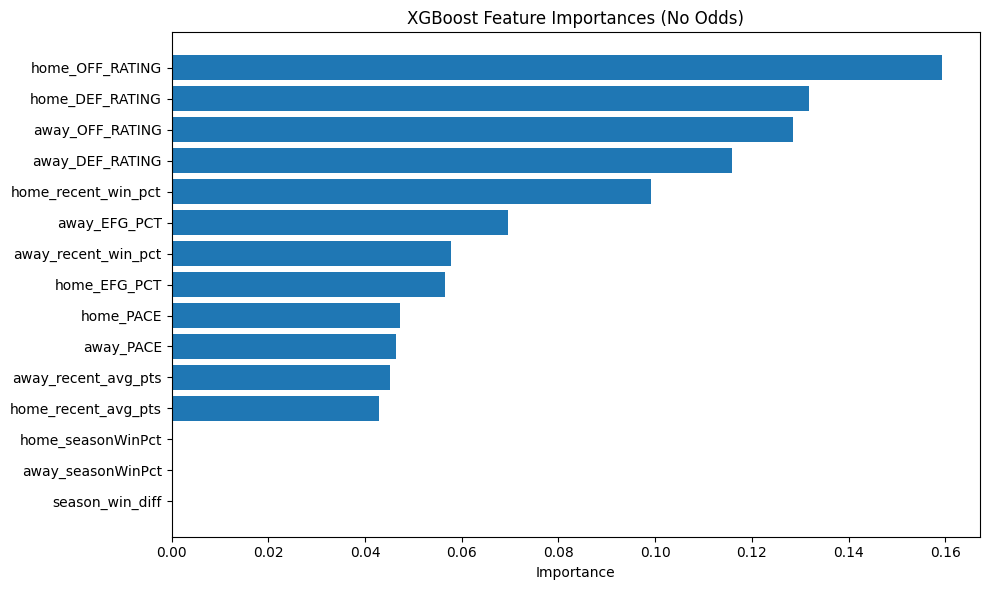

In [9]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("data/final_games_full_features.csv", low_memory=False)
df_raw = df.copy()

# === Add win percentage features ===
df["home_seasonWinPct"] = df["home_seasonWins"] / (df["home_seasonWins"] + df["home_seasonLosses"])
df["away_seasonWinPct"] = df["away_seasonWins"] / (df["away_seasonWins"] + df["away_seasonLosses"])
df["season_win_diff"] = df["home_seasonWinPct"] - df["away_seasonWinPct"]

# === Fill recent stats with neutral values ===
df["home_recent_win_pct"] = df["home_recent_win_pct"].fillna(0.5)
df["away_recent_win_pct"] = df["away_recent_win_pct"].fillna(0.5)
df["home_recent_avg_pts"] = df["home_recent_avg_pts"].fillna(df["home_recent_avg_pts"].median())
df["away_recent_avg_pts"] = df["away_recent_avg_pts"].fillna(df["away_recent_avg_pts"].median())

# === Drop rows missing core features (ADV STATS only — odds removed) ===
required_features = [
    "home_OFF_RATING", "away_OFF_RATING",
    "home_DEF_RATING", "away_DEF_RATING",
    "home_EFG_PCT", "away_EFG_PCT"
]

print("\n🔍 Checking missing values:")
for col in required_features:
    if col not in df.columns:
        print(f"❌ Missing column: {col}")
    else:
        nulls = df[col].isnull().sum()
        print(f"{col}: {nulls} nulls")

existing_required = [col for col in required_features if col in df.columns]
df = df.dropna(subset=existing_required)

print(f"\n✅ Training on {len(df)} rows (from original {len(df_raw)})")

# === Define features (NO odds)
features = [
    "home_seasonWinPct", "away_seasonWinPct", "season_win_diff",
    "home_recent_win_pct", "away_recent_win_pct",
    "home_recent_avg_pts", "away_recent_avg_pts",
    "home_OFF_RATING", "away_OFF_RATING",
    "home_DEF_RATING", "away_DEF_RATING",
    "home_EFG_PCT", "away_EFG_PCT",
    "home_PACE", "away_PACE"
]

X = df[features]
y = df["home_win"]

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# === Train model ===
model = XGBClassifier(
    n_estimators=250,
    learning_rate=0.08,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

# === Evaluate model ===
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy (no odds): {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# === Feature importance chart ===
importance = model.feature_importances_
importance_df = pd.DataFrame({
    "feature": features,
    "importance": importance
}).sort_values(by="importance", ascending=False)

print("\n📊 Feature Importances:")
print(importance_df)

# Optional: plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df["feature"], importance_df["importance"])
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importances (No Odds)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



🔍 Checking missing values:
home_OFF_RATING: 54601 nulls
away_OFF_RATING: 54600 nulls
home_DEF_RATING: 54601 nulls
away_DEF_RATING: 54600 nulls
home_EFG_PCT: 54601 nulls
away_EFG_PCT: 54600 nulls

✅ Training on 16496 rows (from original 71649)


/Users/mk/nba-betting-ai/nba-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:49:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Accuracy (win rank diff): 0.6776
              precision    recall  f1-score   support

           0       0.66      0.55      0.60      1452
           1       0.69      0.78      0.73      1848

    accuracy                           0.68      3300
   macro avg       0.67      0.66      0.67      3300
weighted avg       0.68      0.68      0.67      3300


📊 Feature Importances:
                feature  importance
5       home_OFF_RATING    0.159204
7       home_DEF_RATING    0.131831
6       away_OFF_RATING    0.128514
8       away_DEF_RATING    0.115823
1   home_recent_win_pct    0.099220
10         away_EFG_PCT    0.069606
2   away_recent_win_pct    0.057732
9          home_EFG_PCT    0.056435
11            home_PACE    0.047239
12            away_PACE    0.046399
4   away_recent_avg_pts    0.045170
3   home_recent_avg_pts    0.042829
0         win_rank_diff    0.000000


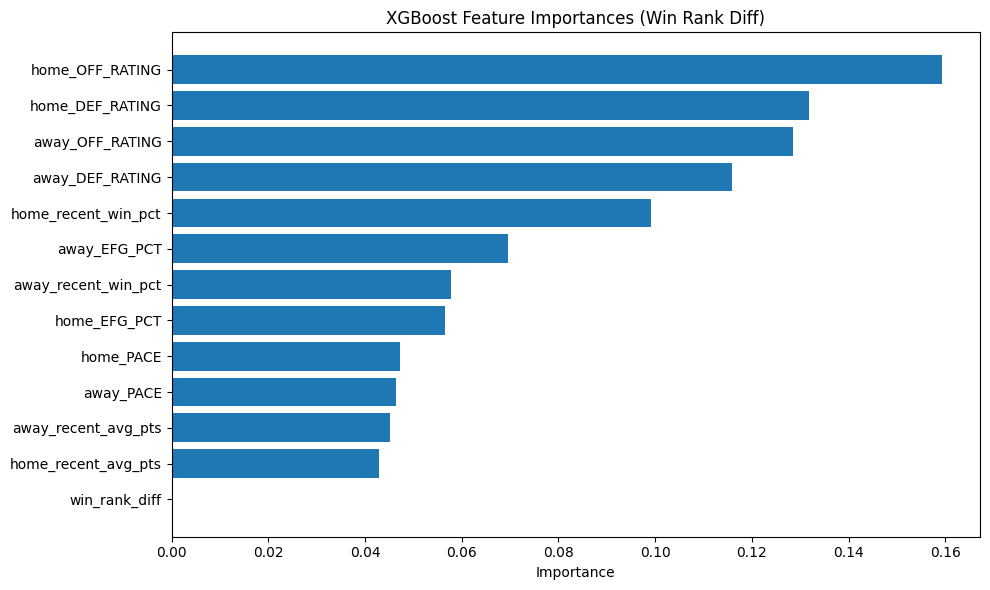

In [10]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("data/final_games_full_features.csv", low_memory=False)
df_raw = df.copy()

# === Add win rank diff feature ===
df["home_seasonWinPct"] = df["home_seasonWins"] / (df["home_seasonWins"] + df["home_seasonLosses"])
df["away_seasonWinPct"] = df["away_seasonWins"] / (df["away_seasonWins"] + df["away_seasonLosses"])

# Convert to league rank (0.0 to 1.0)
df["home_win_rank"] = df["home_seasonWinPct"].rank(pct=True)
df["away_win_rank"] = df["away_seasonWinPct"].rank(pct=True)
df["win_rank_diff"] = df["home_win_rank"] - df["away_win_rank"]

# === Fill recent stats with neutral values ===
df["home_recent_win_pct"] = df["home_recent_win_pct"].fillna(0.5)
df["away_recent_win_pct"] = df["away_recent_win_pct"].fillna(0.5)
df["home_recent_avg_pts"] = df["home_recent_avg_pts"].fillna(df["home_recent_avg_pts"].median())
df["away_recent_avg_pts"] = df["away_recent_avg_pts"].fillna(df["away_recent_avg_pts"].median())

# === Drop rows missing ADV STATS only ===
required_features = [
    "home_OFF_RATING", "away_OFF_RATING",
    "home_DEF_RATING", "away_DEF_RATING",
    "home_EFG_PCT", "away_EFG_PCT"
]

print("\n🔍 Checking missing values:")
for col in required_features:
    if col not in df.columns:
        print(f"❌ Missing column: {col}")
    else:
        nulls = df[col].isnull().sum()
        print(f"{col}: {nulls} nulls")

df = df.dropna(subset=required_features)

print(f"\n✅ Training on {len(df)} rows (from original {len(df_raw)})")

# === Define features (NO ODDS)
features = [
    "win_rank_diff",
    "home_recent_win_pct", "away_recent_win_pct",
    "home_recent_avg_pts", "away_recent_avg_pts",
    "home_OFF_RATING", "away_OFF_RATING",
    "home_DEF_RATING", "away_DEF_RATING",
    "home_EFG_PCT", "away_EFG_PCT",
    "home_PACE", "away_PACE"
]

X = df[features]
y = df["home_win"]

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# === Train model ===
model = XGBClassifier(
    n_estimators=250,
    learning_rate=0.08,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

# === Evaluate model ===
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy (win rank diff): {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# === Feature importance chart ===
importance = model.feature_importances_
importance_df = pd.DataFrame({
    "feature": features,
    "importance": importance
}).sort_values(by="importance", ascending=False)

print("\n📊 Feature Importances:")
print(importance_df)

# Optional: plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df["feature"], importance_df["importance"])
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importances (Win Rank Diff)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



🔍 Checking missing values:
home_OFF_RATING: 54601 nulls
away_OFF_RATING: 54600 nulls
home_DEF_RATING: 54601 nulls
away_DEF_RATING: 54600 nulls
home_EFG_PCT: 54601 nulls
away_EFG_PCT: 54600 nulls

✅ Training on 16496 rows (from original 71649)


/Users/mk/nba-betting-ai/nba-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Accuracy (win form combo): 0.6776
              precision    recall  f1-score   support

           0       0.66      0.55      0.60      1452
           1       0.69      0.78      0.73      1848

    accuracy                           0.68      3300
   macro avg       0.67      0.66      0.67      3300
weighted avg       0.68      0.68      0.67      3300


📊 Feature Importances:
                feature  importance
5       home_OFF_RATING    0.159204
7       home_DEF_RATING    0.131831
6       away_OFF_RATING    0.128514
8       away_DEF_RATING    0.115823
1   home_recent_win_pct    0.099220
10         away_EFG_PCT    0.069606
2   away_recent_win_pct    0.057732
9          home_EFG_PCT    0.056435
11            home_PACE    0.047239
12            away_PACE    0.046399
4   away_recent_avg_pts    0.045170
3   home_recent_avg_pts    0.042829
0        win_form_combo    0.000000


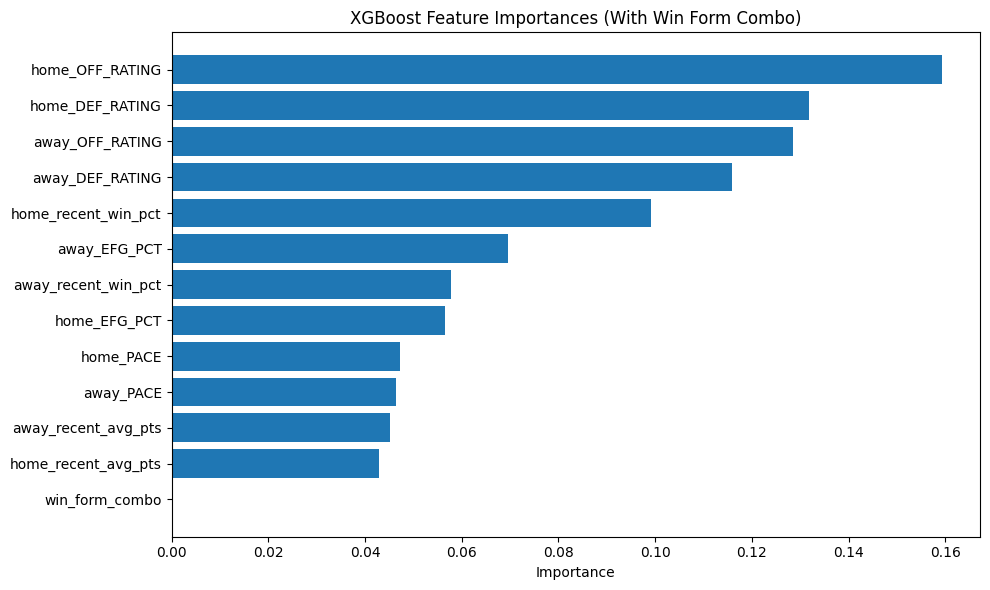

In [11]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("data/final_games_full_features.csv", low_memory=False)
df_raw = df.copy()

# === Add season win %, recent win %, and combo signal ===
df["home_seasonWinPct"] = df["home_seasonWins"] / (df["home_seasonWins"] + df["home_seasonLosses"])
df["away_seasonWinPct"] = df["away_seasonWins"] / (df["away_seasonWins"] + df["away_seasonLosses"])
df["home_recent_win_pct"] = df["home_recent_win_pct"].fillna(0.5)
df["away_recent_win_pct"] = df["away_recent_win_pct"].fillna(0.5)

# 👇 Custom combo feature that forces the model to consider both
df["win_form_combo"] = (
    df["home_seasonWinPct"] - df["away_seasonWinPct"]
) * (
    df["home_recent_win_pct"] - df["away_recent_win_pct"]
)

# === Fill recent avg points ===
df["home_recent_avg_pts"] = df["home_recent_avg_pts"].fillna(df["home_recent_avg_pts"].median())
df["away_recent_avg_pts"] = df["away_recent_avg_pts"].fillna(df["away_recent_avg_pts"].median())

# === Drop rows missing ADV STATS ===
required_features = [
    "home_OFF_RATING", "away_OFF_RATING",
    "home_DEF_RATING", "away_DEF_RATING",
    "home_EFG_PCT", "away_EFG_PCT"
]

print("\n🔍 Checking missing values:")
for col in required_features:
    if col not in df.columns:
        print(f"❌ Missing column: {col}")
    else:
        nulls = df[col].isnull().sum()
        print(f"{col}: {nulls} nulls")

df = df.dropna(subset=required_features)

print(f"\n✅ Training on {len(df)} rows (from original {len(df_raw)})")

# === Define features (NO odds, but includes win_form_combo)
features = [
    "win_form_combo",
    "home_recent_win_pct", "away_recent_win_pct",
    "home_recent_avg_pts", "away_recent_avg_pts",
    "home_OFF_RATING", "away_OFF_RATING",
    "home_DEF_RATING", "away_DEF_RATING",
    "home_EFG_PCT", "away_EFG_PCT",
    "home_PACE", "away_PACE"
]

X = df[features]
y = df["home_win"]

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# === Train model ===
model = XGBClassifier(
    n_estimators=250,
    learning_rate=0.08,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

# === Evaluate model ===
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy (win form combo): {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# === Feature importance chart ===
importance = model.feature_importances_
importance_df = pd.DataFrame({
    "feature": features,
    "importance": importance
}).sort_values(by="importance", ascending=False)

print("\n📊 Feature Importances:")
print(importance_df)

# Optional: plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df["feature"], importance_df["importance"])
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importances (With Win Form Combo)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



🔍 Checking missing values:
home_OFF_RATING: 54601 nulls
away_OFF_RATING: 54600 nulls
home_DEF_RATING: 54601 nulls
away_DEF_RATING: 54600 nulls
home_EFG_PCT: 54601 nulls
away_EFG_PCT: 54600 nulls

✅ Training on 16496 rows (from original 71649)


/Users/mk/nba-betting-ai/nba-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:57:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Accuracy (v4.0 matchup diffs): 0.6482
              precision    recall  f1-score   support

           0       0.63      0.48      0.55      1452
           1       0.66      0.78      0.71      1848

    accuracy                           0.65      3300
   macro avg       0.64      0.63      0.63      3300
weighted avg       0.65      0.65      0.64      3300


📊 Feature Importances:
               feature  importance
2      recent_win_diff    0.362457
7         away_EFG_PCT    0.144197
6         home_EFG_PCT    0.137808
3            pace_diff    0.080748
1      def_rating_diff    0.078202
4  home_recent_avg_pts    0.067436
0      off_rating_diff    0.065200
5  away_recent_avg_pts    0.063952


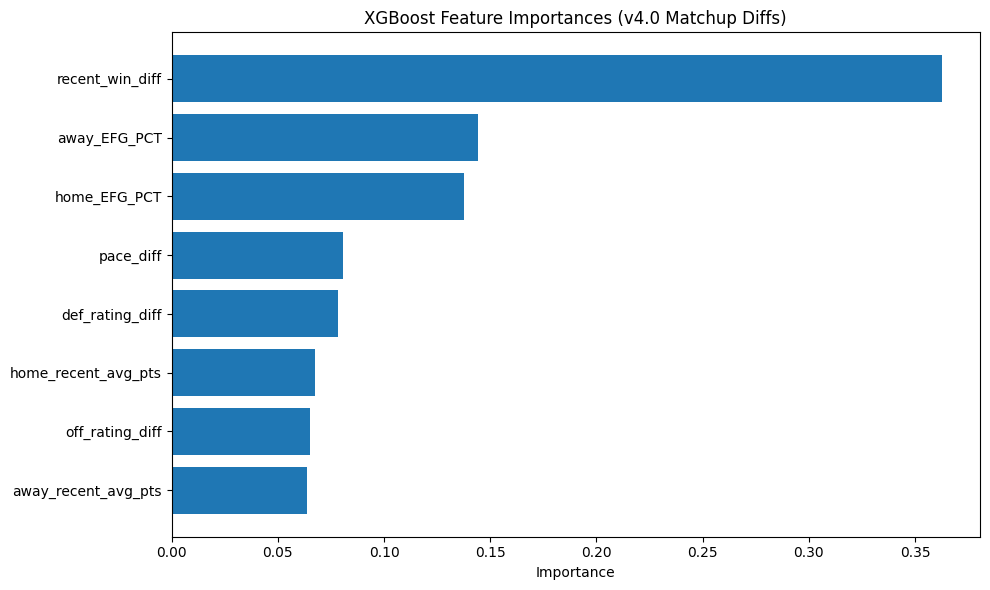

In [12]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("data/final_games_full_features.csv", low_memory=False)
df_raw = df.copy()

# === Fill recent stats with neutral values ===
df["home_recent_win_pct"] = df["home_recent_win_pct"].fillna(0.5)
df["away_recent_win_pct"] = df["away_recent_win_pct"].fillna(0.5)
df["home_recent_avg_pts"] = df["home_recent_avg_pts"].fillna(df["home_recent_avg_pts"].median())
df["away_recent_avg_pts"] = df["away_recent_avg_pts"].fillna(df["away_recent_avg_pts"].median())

# === Matchup-Based Engineered Features ===
df["off_rating_diff"] = df["home_OFF_RATING"] - df["away_DEF_RATING"]
df["def_rating_diff"] = df["home_DEF_RATING"] - df["away_OFF_RATING"]
df["recent_win_diff"] = df["home_recent_win_pct"] - df["away_recent_win_pct"]
df["pace_diff"] = df["home_PACE"] - df["away_PACE"]

# === Drop rows missing ADV STATS ===
required_features = [
    "home_OFF_RATING", "away_OFF_RATING",
    "home_DEF_RATING", "away_DEF_RATING",
    "home_EFG_PCT", "away_EFG_PCT"
]

print("\n🔍 Checking missing values:")
for col in required_features:
    if col not in df.columns:
        print(f"❌ Missing column: {col}")
    else:
        nulls = df[col].isnull().sum()
        print(f"{col}: {nulls} nulls")

df = df.dropna(subset=required_features)

print(f"\n✅ Training on {len(df)} rows (from original {len(df_raw)})")

# === Feature Set for v4.0 ===
features = [
    "off_rating_diff",
    "def_rating_diff",
    "recent_win_diff",
    "pace_diff",
    "home_recent_avg_pts", "away_recent_avg_pts",
    "home_EFG_PCT", "away_EFG_PCT"
]

X = df[features]
y = df["home_win"]

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# === Train model ===
model = XGBClassifier(
    n_estimators=250,
    learning_rate=0.08,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

# === Evaluate model ===
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy (v4.0 matchup diffs): {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# === Feature importance chart ===
importance = model.feature_importances_
importance_df = pd.DataFrame({
    "feature": features,
    "importance": importance
}).sort_values(by="importance", ascending=False)

print("\n📊 Feature Importances:")
print(importance_df)

# Optional: plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df["feature"], importance_df["importance"])
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importances (v4.0 Matchup Diffs)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



🔍 Checking missing values:
home_OFF_RATING: 54601 nulls
away_OFF_RATING: 54600 nulls
home_DEF_RATING: 54601 nulls
away_DEF_RATING: 54600 nulls
home_EFG_PCT: 54601 nulls
away_EFG_PCT: 54600 nulls
home_odds: 54035 nulls
away_odds: 54035 nulls

✅ Training on 16496 rows (from original 71649)

🧪 Feature dtypes (before):
off_rating_diff         float64
def_rating_diff         float64
recent_win_diff         float64
pace_diff               float64
home_recent_avg_pts     float64
away_recent_avg_pts     float64
home_EFG_PCT            float64
away_EFG_PCT            float64
home_odds               float64
away_odds               float64
odds_diff               float64
implied_home_win_pct    float64
implied_away_win_pct    float64
implied_win_diff        float64
dtype: object


/Users/mk/nba-betting-ai/nba-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:03:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Accuracy (v4.1 combo model): 0.6781
              precision    recall  f1-score   support

           0       0.63      0.55      0.59      1382
           1       0.70      0.77      0.74      1917

    accuracy                           0.68      3299
   macro avg       0.67      0.66      0.66      3299
weighted avg       0.67      0.68      0.67      3299


📊 Feature Importances:
                 feature  importance
10             odds_diff    0.378801
9              away_odds    0.250495
8              home_odds    0.088967
13      implied_win_diff    0.061698
12  implied_away_win_pct    0.027853
6           home_EFG_PCT    0.024449
3              pace_diff    0.022013
5    away_recent_avg_pts    0.021462
7           away_EFG_PCT    0.021361
4    home_recent_avg_pts    0.021320
0        off_rating_diff    0.020854
1        def_rating_diff    0.020491
2        recent_win_diff    0.020413
11  implied_home_win_pct    0.019821


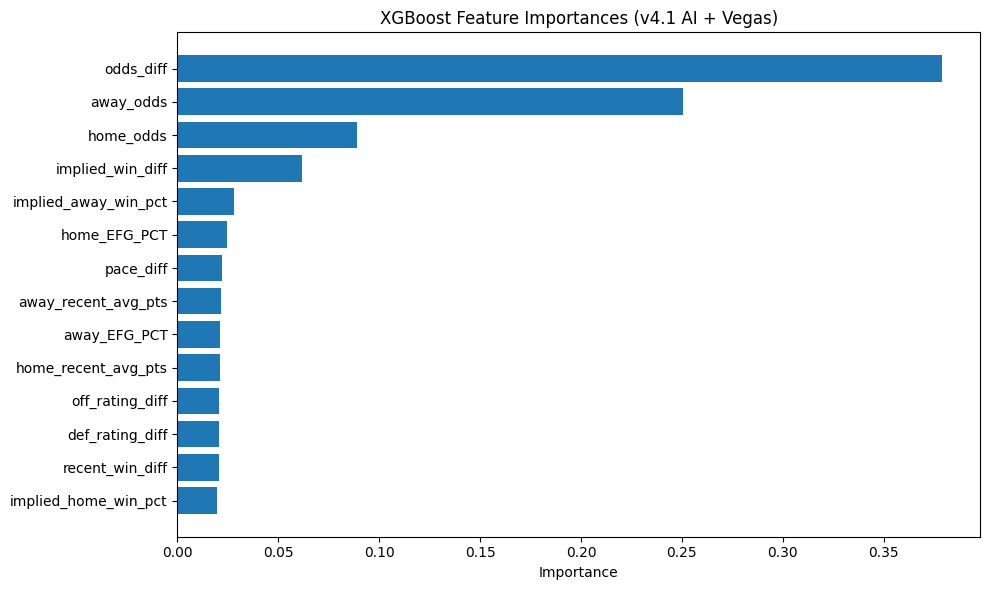

In [14]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("data/final_games_full_features.csv", low_memory=False)
df_raw = df.copy()

# === Fill missing values ===
df["home_recent_win_pct"] = df["home_recent_win_pct"].fillna(0.5)
df["away_recent_win_pct"] = df["away_recent_win_pct"].fillna(0.5)
df["home_recent_avg_pts"] = df["home_recent_avg_pts"].fillna(df["home_recent_avg_pts"].median())
df["away_recent_avg_pts"] = df["away_recent_avg_pts"].fillna(df["away_recent_avg_pts"].median())

# === Drop rows with missing core stats or odds ===
required_features = [
    "home_OFF_RATING", "away_OFF_RATING",
    "home_DEF_RATING", "away_DEF_RATING",
    "home_EFG_PCT", "away_EFG_PCT",
    "home_odds", "away_odds"
]

print("\n🔍 Checking missing values:")
for col in required_features:
    if col not in df.columns:
        print(f"❌ Missing column: {col}")
    else:
        nulls = df[col].isnull().sum()
        print(f"{col}: {nulls} nulls")

df = df.dropna(subset=required_features)
print(f"\n✅ Training on {len(df)} rows (from original {len(df_raw)})")

# === Engineered matchup features ===
df["off_rating_diff"] = df["home_OFF_RATING"] - df["away_DEF_RATING"]
df["def_rating_diff"] = df["home_DEF_RATING"] - df["away_OFF_RATING"]
df["recent_win_diff"] = df["home_recent_win_pct"] - df["away_recent_win_pct"]
df["pace_diff"] = df["home_PACE"] - df["away_PACE"]

# === Vegas-based engineered features ===
df["odds_diff"] = df["home_odds"] - df["away_odds"]
df["implied_home_win_pct"] = 1 / df["home_odds"]
df["implied_away_win_pct"] = 1 / df["away_odds"]
df["implied_win_diff"] = df["implied_home_win_pct"] - df["implied_away_win_pct"]

# === Define features ===
features = [
    "off_rating_diff", "def_rating_diff", "recent_win_diff", "pace_diff",
    "home_recent_avg_pts", "away_recent_avg_pts",
    "home_EFG_PCT", "away_EFG_PCT",
    "home_odds", "away_odds", "odds_diff",
    "implied_home_win_pct", "implied_away_win_pct", "implied_win_diff"
]

X = df[features]
y = df["home_win"]

# === Force numeric and drop rows with NaNs ===
print("\n🧪 Feature dtypes (before):")
print(X.dtypes)

X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()
y = y.loc[X.index]

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# === Train model ===
model = XGBClassifier(
    n_estimators=250,
    learning_rate=0.08,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

# === Evaluate model ===
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy (v4.1 combo model): {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# === Feature importance chart ===
importance = model.feature_importances_
importance_df = pd.DataFrame({
    "feature": features,
    "importance": importance
}).sort_values(by="importance", ascending=False)

print("\n📊 Feature Importances:")
print(importance_df)

# Optional: plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df["feature"], importance_df["importance"])
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importances (v4.1 AI + Vegas)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



✅ Training on 16496 rows (from original 71649)
Fitting 3 folds for each of 16 candidates, totalling 48 fits


/Users/mk/nba-betting-ai/nba-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:04:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/mk/nba-betting-ai/nba-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:04:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/mk/nba-betting-ai/nba-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:04:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/mk/nba-betting-ai/nba-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:04:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:


🔍 Best XGBoost Parameters:
{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}

✅ Accuracy (v4.2 tuned + calibrated): 0.6860
              precision    recall  f1-score   support

           0       0.66      0.52      0.58      1382
           1       0.70      0.80      0.75      1917

    accuracy                           0.69      3299
   macro avg       0.68      0.66      0.67      3299
weighted avg       0.68      0.69      0.68      3299


📊 Feature Importances:
                 feature  importance
10             odds_diff    0.357384
9              away_odds    0.229969
8              home_odds    0.191068
13      implied_win_diff    0.063696
12  implied_away_win_pct    0.032943
6           home_EFG_PCT    0.015989
7           away_EFG_PCT    0.015062
3              pace_diff    0.014588
0        off_rating_diff    0.014282
5    away_recent_avg_pts    0.013618
1        def_rating_diff    0.013573
4    home_recent_avg_pts    0.012996
2        recent

/Users/mk/nba-betting-ai/nba-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:04:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


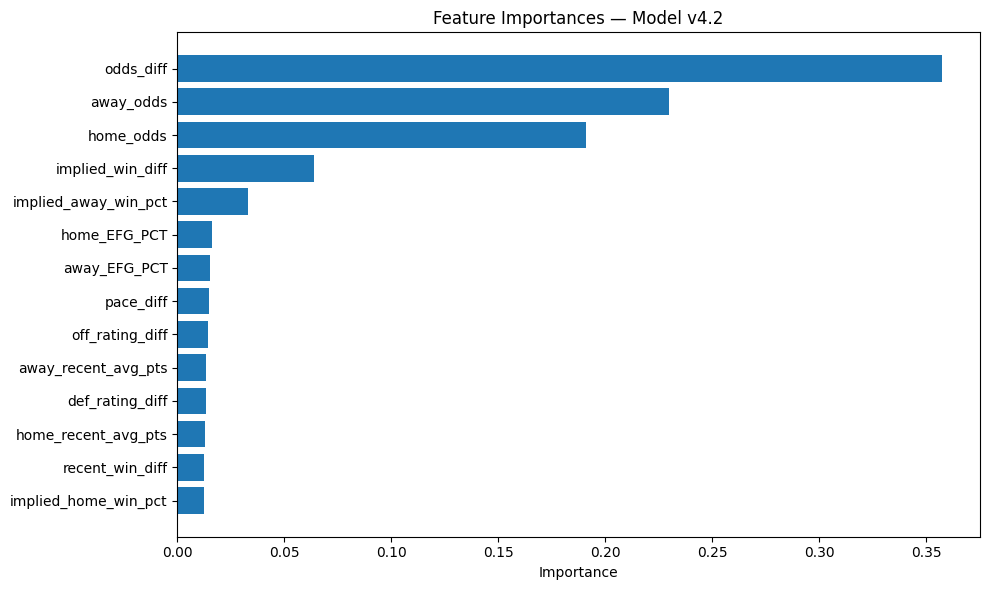

In [15]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.calibration import CalibratedClassifierCV
import joblib
import matplotlib.pyplot as plt

# === Load Data ===
df = pd.read_csv("data/final_games_full_features.csv", low_memory=False)
df_raw = df.copy()

# === Fill missing values ===
df["home_recent_win_pct"] = df["home_recent_win_pct"].fillna(0.5)
df["away_recent_win_pct"] = df["away_recent_win_pct"].fillna(0.5)
df["home_recent_avg_pts"] = df["home_recent_avg_pts"].fillna(df["home_recent_avg_pts"].median())
df["away_recent_avg_pts"] = df["away_recent_avg_pts"].fillna(df["away_recent_avg_pts"].median())

# === Drop rows with missing core stats or odds ===
required_features = [
    "home_OFF_RATING", "away_OFF_RATING",
    "home_DEF_RATING", "away_DEF_RATING",
    "home_EFG_PCT", "away_EFG_PCT",
    "home_odds", "away_odds"
]
df = df.dropna(subset=required_features)
print(f"\n✅ Training on {len(df)} rows (from original {len(df_raw)})")

# === Engineered features ===
df["off_rating_diff"] = df["home_OFF_RATING"] - df["away_DEF_RATING"]
df["def_rating_diff"] = df["home_DEF_RATING"] - df["away_OFF_RATING"]
df["recent_win_diff"] = df["home_recent_win_pct"] - df["away_recent_win_pct"]
df["pace_diff"] = df["home_PACE"] - df["away_PACE"]
df["odds_diff"] = df["home_odds"] - df["away_odds"]
df["implied_home_win_pct"] = 1 / df["home_odds"]
df["implied_away_win_pct"] = 1 / df["away_odds"]
df["implied_win_diff"] = df["implied_home_win_pct"] - df["implied_away_win_pct"]

# === Select Features & Target ===
features = [
    "off_rating_diff", "def_rating_diff", "recent_win_diff", "pace_diff",
    "home_recent_avg_pts", "away_recent_avg_pts",
    "home_EFG_PCT", "away_EFG_PCT",
    "home_odds", "away_odds", "odds_diff",
    "implied_home_win_pct", "implied_away_win_pct", "implied_win_diff"
]

X = df[features].apply(pd.to_numeric, errors='coerce').dropna()
y = df["home_win"].loc[X.index]

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# === GridSearch for best XGBoost model ===
param_grid = {
    'n_estimators': [100, 250],
    'max_depth': [4, 5],
    'learning_rate': [0.05, 0.08],
    'subsample': [0.8, 1.0]
}

base_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid = GridSearchCV(base_model, param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_
print("\n🔍 Best XGBoost Parameters:")
print(grid.best_params_)

# === Calibrate model ===
calibrated_model = CalibratedClassifierCV(best_xgb, method='isotonic', cv=3)
calibrated_model.fit(X_train, y_train)

# === Evaluate model ===
y_pred = calibrated_model.predict(X_test)
y_proba = calibrated_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy (v4.2 tuned + calibrated): {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# === Feature importance from base model ===
importances = best_xgb.feature_importances_
importance_df = pd.DataFrame({
    "feature": features,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print("\n📊 Feature Importances:")
print(importance_df)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df["feature"], importance_df["importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importances — Model v4.2")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
from get_odds import get_odds_dict
from get_team_stats import get_team_stats
from get_recent_stats import get_recent_win_pct, get_recent_avg_pts
from datetime import datetime

def get_today_games_with_features():
    # === Get Today's Games from Odds API ===
    odds_df = pd.read_csv(f"data/nba_odds_{datetime.today().strftime('%Y-%m-%d')}.csv")

    rows = []
    for _, row in odds_df.iterrows():
        home = row["home_team"]
        away = row["away_team"]
        try:
            home_clean = home.lower().strip()
            away_clean = away.lower().strip()

            # Get team stats
            home_stats = get_team_stats(home_clean)
            away_stats = get_team_stats(away_clean)

            # Recent performance
            home_recent_win = get_recent_win_pct(home_clean)
            away_recent_win = get_recent_win_pct(away_clean)
            home_recent_pts = get_recent_avg_pts(home_clean)
            away_recent_pts = get_recent_avg_pts(away_clean)

            # Vegas odds
            home_odds = row["home_odds"]
            away_odds = row["away_odds"]
            odds_diff = home_odds - away_odds
            implied_home = 1 / abs(home_odds) if home_odds != 0 else 0
            implied_away = 1 / abs(away_odds) if away_odds != 0 else 0
            implied_diff = implied_home - implied_away

            # Engineered features
            off_rating_diff = home_stats["OFF_RATING"] - away_stats["DEF_RATING"]
            def_rating_diff = home_stats["DEF_RATING"] - away_stats["OFF_RATING"]
            recent_win_diff = home_recent_win - away_recent_win
            pace_diff = home_stats["PACE"] - away_stats["PACE"]

            rows.append({
                "hometeam": home,
                "awayteam": away,
                "home_odds": home_odds,
                "away_odds": away_odds,
                "off_rating_diff": off_rating_diff,
                "def_rating_diff": def_rating_diff,
                "recent_win_diff": recent_win_diff,
                "pace_diff": pace_diff,
                "home_recent_avg_pts": home_recent_pts,
                "away_recent_avg_pts": away_recent_pts,
                "home_EFG_PCT": home_stats["EFG_PCT"],
                "away_EFG_PCT": away_stats["EFG_PCT"],
                "home_OFF_RATING": home_stats["OFF_RATING"],
                "away_OFF_RATING": away_stats["OFF_RATING"],
                "home_DEF_RATING": home_stats["DEF_RATING"],
                "away_DEF_RATING": away_stats["DEF_RATING"],
                "home_recent_win_pct": home_recent_win,
                "away_recent_win_pct": away_recent_win,
                "odds_diff": odds_diff,
                "implied_home_win_pct": implied_home,
                "implied_away_win_pct": implied_away,
                "implied_win_diff": implied_diff
            })

        except Exception as e:
            print(f"❌ Skipping game {home} vs {away}: {e}")
            continue

    return pd.DataFrame(rows)


In [26]:
import pandas as pd
import joblib
from get_today_games_features import get_today_games_with_features  # returns full-feature DataFrame

# === Load Selected Models ===
models = {
    "v3": joblib.load("nba_model_v3.pkl"),
    "api_only": joblib.load("nba_model_api_only.pkl"),
    "api_blended": joblib.load("nba_model_api_blended.pkl"),
    "with_odds": joblib.load("nba_model_with_odds.pkl")
}

# === Feature Sets for Each Model ===
feature_sets = {
    "v3": [
        "home_OFF_RATING", "away_OFF_RATING", "home_DEF_RATING", "away_DEF_RATING",
        "home_EFG_PCT", "away_EFG_PCT", "home_odds", "away_odds"
    ],
    "api_only": [
        "home_OFF_RATING", "away_OFF_RATING", "home_DEF_RATING", "away_DEF_RATING",
        "home_EFG_PCT", "away_EFG_PCT", "home_recent_win_pct", "away_recent_win_pct"
    ],
    "api_blended": [
        "home_OFF_RATING", "away_OFF_RATING", "home_DEF_RATING", "away_DEF_RATING",
        "home_EFG_PCT", "away_EFG_PCT", "home_recent_win_pct", "away_recent_win_pct",
        "home_recent_avg_pts", "away_recent_avg_pts"
    ],
    "with_odds": [
        "home_OFF_RATING", "away_OFF_RATING", "home_DEF_RATING", "away_DEF_RATING",
        "home_EFG_PCT", "away_EFG_PCT", "home_recent_win_pct", "away_recent_win_pct",
        "home_odds", "away_odds", "odds_diff", "implied_home_win_pct"
    ]
}

# === Get Live Game Data ===
df = get_today_games_with_features()
if df.empty:
    print("❌ No games or failed to fetch features.")
    exit()

# === Init result table ===
results = df[["hometeam", "awayteam", "home_odds", "away_odds"]].copy()

# === Loop through models ===
for name, model in models.items():
    features = feature_sets[name]
    model_X = df[features].copy()
    model_X = model_X.apply(pd.to_numeric, errors="coerce").dropna()
    df_valid = df.loc[model_X.index]  # Filter out invalid rows

    prob = model.predict_proba(model_X)[:, 1]  # Home win prob
    results = results.loc[model_X.index]  # Sync with current model's valid rows
    results[f"{name}_prob"] = prob

# === Output results ===
pd.set_option("display.max_columns", None)
print("\n🧠 Model Comparison for Today's Games:\n")
print(results.to_string(index=False))


ImportError: cannot import name 'TEAM_NAME_TO_ODDS_NAME' from 'team_name_mapping' (/Users/mk/nba-betting-ai/team_name_mapping.py)

In [1]:
print(games.columns)
exit()


NameError: name 'games' is not defined